In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


---
## **Name: Ritesh Sharma**
## **Roll No: 24f1001677**
---

# ***Table of Content:***
---
### 1. Cinema Audience Forecasting Project Overview
---
### 2. Data Loading (7 datasets)
---
### 3. Exploratory Data Analysis (EDA) for each Datasets
           1. How Large Is the Dataset?
           2. What Does the Data Look Like?
           3. What Are the Data Types?
           4. Are There Any Missing Values?
           5. What Do the Descriptive Statistics Reveal?
           6. Correlation matrix if numerical data there.
           7. Univariate Analysis
           8. Bivariate Analysis
---
### 4. Creation of Master Dataset
### 5. EDA of Final_Dataset.
### 6. Initial Feature Engineering with final_df
### 7. Data Preprocessing included Encoding, scaling through pipelines.
### 8. Again Advanced Feature Engineering, like K select, Polynomial feature extractions.
---
### 9. Data splitting into X_train, X_val, y_train and y_eval
### 10. Model Training for submision 
---
### 11. Hyper Parameter Tuning
### 12. Extra Data training included, LGB,Ridge,XGB_Boost
### 13. Prediction and Evaluations
---
### 14. Comparision Table of the all models.
---

# ========================================================================================================================================================================================================
# ***1. Cinema Audience Forecasting Challenge***
# ========================================================================================================================================================================================================
## **Project Overview**
The **Cinema Audience Forecasting Challenge** focuses on predicting the *audience count* for various cinema theaters using historical and contextual data.  
This task involves combining multiple datasets from different sources — such as theater details, movie bookings, and audience visits — to build accurate and interpretable forecasting models.

By performing **data preprocessing**, **exploratory data analysis (EDA)**, **feature engineering**, and **modeling**, our goal is to uncover the key factors influencing audience attendance and forecast future trends effectively.

---

## **Data Loading and Overview**

The challenge provides several structured datasets that collectively capture audience behavior, theater operations, and booking details across multiple platforms.  
Below is an overview of each dataset and its role in the project:

---

### **Movie Theater Relation**
- **Purpose:** Links theaters across different platforms (e.g., CinePOS and BookNow) using unique identifiers.  
- **Key Columns:**
  - `cine_theater_id` – Theater ID from CinePOS platform  
  - `booknow_theater_id` – Corresponding ID from BookNow platform  
- **Usage:** Helps in merging and aligning data between different theater sources for unified analysis.

---

### **Date Information**
- **Purpose:** Provides metadata about each date, including calendar details, weekdays, and holidays.  
- **Key Columns:**
  - `date` – Calendar date  
  - `day_of_week`, `month`, `year` – Date components for trend analysis  
  - `is_holiday` – Indicator for public holidays or festivals  
- **Usage:** Supports **time-series decomposition**, **seasonality detection**, and **holiday impact analysis**.

---

### **Sample Submission**
- **Purpose:** Defines the required format for final predictions to be submitted.  
- **Key Columns:**
  - `id` – Unique identifier for each prediction instance  
  - `audience_count` – Target variable to be predicted  
- **Usage:** Serves as a template for generating submission files after model prediction.

---

### **BookNow Theaters**
- **Purpose:** Contains theater-level metadata from the **BookNow** platform.  
- **Key Columns:**
  - `booknow_theater_id`, `city`, `latitude`, `longitude`  
  - `capacity`, `screen_count`, `brand_name`  
- **Usage:** Helps analyze **geographical** and **capacity-based** audience patterns.

---

### **CinePOS Booking**
- **Purpose:** Provides booking transaction data from the **CinePOS** system.  
- **Key Columns:**
  - `cine_theater_id`, `booking_date`, `tickets_sold`, `movie_id`  
- **Usage:** Useful for studying **booking trends**, **daily ticket sales**, and **movie popularity**.

---

### **CinePOS Theaters**
- **Purpose:** Theater metadata for CinePOS theaters, similar to BookNow Theaters dataset.  
- **Key Columns:**
  - `cine_theater_id`, `theater_name`, `region`, `latitude`, `longitude`, `capacity`  
- **Usage:** Assists in **mapping**, **regional comparison**, and **geospatial visualization**.

---

### **BookNow Visits**
- **Purpose:** Captures customer visit patterns and traffic at theaters listed on BookNow.  
- **Key Columns:**
  - `booknow_theater_id`, `visit_date`, `unique_visitors`, `repeat_visitors`  
- **Usage:** Enables analysis of **customer loyalty**, **traffic volume**, and **temporal patterns**.

---

### **BookNow Booking**
- **Purpose:** Contains booking transactions made through BookNow platform.  
- **Key Columns:**
  - `booknow_theater_id`, `booking_date`, `tickets_booked`, `revenue`  
- **Usage:** Crucial for understanding **demand fluctuations**, **price sensitivity**, and **revenue forecasting**.

---

# ===========================================================================================================================================================================================
# ***2. Data Loading***
# ===========================================================================================================================================================================================

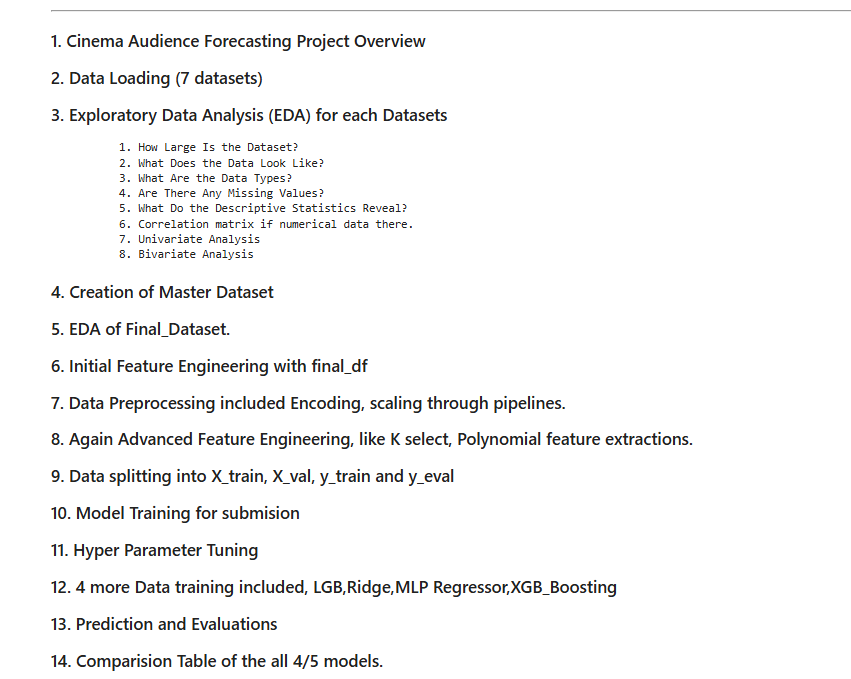

In [2]:
# Here i am loading my movie theater relation data..................
import numpy as np
import pandas as pd
MTID_R=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv')
MTID_R

,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923
3,book_00094,cinePOS_02479
4,book_00052,cinePOS_06750
...,...,...
145,book_00363,cinePOS_09012
146,book_00042,cinePOS_02789
147,book_00746,cinePOS_09057
148,book_00625,cinePOS_05648


In [3]:
# Here i am loading my Date_info Dataset.............
Date_info=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv')
Date_info

,show_date,day_of_week
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday
3,2023-01-04,Wednesday
4,2023-01-05,Thursday
...,...,...
542,2024-06-26,Wednesday
543,2024-06-27,Thursday
544,2024-06-28,Friday
545,2024-06-29,Saturday


In [4]:
# Here i am loading my Sample_submission data set..........
Sample_submission=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv')
Sample_submission

,ID,audience_count
0,book_00001_2024-03-01,0
1,book_00001_2024-03-02,0
2,book_00001_2024-03-03,0
3,book_00001_2024-03-04,0
4,book_00001_2024-03-06,0
...,...,...
38057,book_00829_2024-04-18,0
38058,book_00829_2024-04-19,0
38059,book_00829_2024-04-20,0
38060,book_00829_2024-04-21,0


In [5]:
# Here i am loading my booknow_theater datasets.......................
booknow_T=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv')
booknow_T.sample(20)

,book_theater_id,theater_type,theater_area,latitude,longitude
441,book_00265,Other,Area_005,22.623328,78.237886
221,book_00032,Action,Area_009,23.010029,79.942206
166,NaN,Other,Area_027,22.611676,78.228299
490,NaN,Other,Area_027,22.611676,78.228299
540,book_00031,Other,Area_019,22.643963,77.970347
422,NaN,Other,Area_002,23.004410,79.934515
159,NaN,Other,Area_011,22.997768,79.913144
344,NaN,Comedy,Area_051,22.173960,76.173250
766,NaN,Drama,Area_090,22.667243,77.908017
512,book_00248,Other,Area_046,23.010325,79.960840


In [6]:
# Here i am loading my cinePOS_B dataset....................
cinePOS_B=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv')
cinePOS_B.head()

,cine_theater_id,show_datetime,booking_datetime,tickets_sold
0,cinePOS_00001,2023-01-01 11:00:00,2023-01-01 09:00:00,1
1,cinePOS_00002,2023-01-01 13:00:00,2023-01-01 06:00:00,3
2,cinePOS_00003,2023-01-01 16:00:00,2023-01-01 14:00:00,2
3,cinePOS_00004,2023-01-01 17:00:00,2023-01-01 11:00:00,5
4,cinePOS_00005,2023-01-01 17:00:00,2023-01-01 03:00:00,13


In [7]:
# Here i am loading my cinePOS_T , which is  cinepos _theater datasets.............
cinePOS_T=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv')
cinePOS_T.head()


,cine_theater_id,theater_type,theater_area,latitude,longitude
0,cinePOS_05466,Other,Area_104,22.619233,78.113017
1,cinePOS_08708,Other,Area_104,22.619233,78.113017
2,cinePOS_00753,Other,Area_104,22.619233,78.113017
3,cinePOS_05776,Other,Area_104,22.619233,78.113017
4,cinePOS_07536,Other,Area_104,23.004410,79.934515


In [8]:
# Here i am loading my booknow_visits, dataset.................
booknow_visits=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv')
booknow_visits.sample(10)

,book_theater_id,show_date,audience_count
104816,book_00409,2024-01-13,2
171393,book_00667,2023-12-17,66
118344,book_00462,2023-12-31,20
99250,book_00388,2023-02-05,20
174623,book_00679,2024-01-27,22
40466,book_00158,2024-02-16,108
50038,book_00194,2023-04-28,8
210027,book_00814,2023-09-12,6
16817,book_00070,2024-01-26,88
83802,book_00327,2024-02-17,20


In [9]:
# here i am loading Booknow_B dataset..............
booknow_B=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv')
booknow_B.head()

,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5


---
# ***3. Exploratory Data Analysis (EDA) for each Datasets.***
---

#  ***Getting Started with the Datasets***
This phase acts as a *data exploratory mission* — helping us understand the structure, quality, and readiness of our data before we begin extracting insights.

To achieve this, we’ll systematically address six foundational questions for every dataset:

---

##  **1. How Large Is the Dataset?**
> *Objective:* Determine the overall **shape** — the number of rows (records) and columns (features).  
Understanding the dataset size gives an idea of data scale, complexity, and computational considerations.

---

##  **2. What Does the Data Look Like?**
> *Objective:* Peek into the **first few rows** using `.head()` to get a sense of structure and content.  
This step helps us intuitively grasp what kind of information each column holds.

---

##  **3. What Are the Data Types?**
> *Objective:* Inspect the **data types** of each feature — numeric, categorical, datetime, or text.  
Knowing types early helps guide feature engineering and preprocessing steps (e.g., encoding, normalization).

---

##  **4. Are There Any Missing Values?**
> *Objective:* Identify columns with **null or NaN values**.  
Handling missing data properly ensures model accuracy and prevents bias in downstream analysis.

---

##  **5. What Do the Descriptive Statistics Reveal?**
> *Objective:* Use `.describe()` and related summaries to view **statistical properties** like mean, median, std, and distribution ranges.  
This step highlights outliers, skewed distributions, and feature variability.

---

##  **6. Is There Any Duplication or Redundancy?**
> *Objective:* Detect **duplicate rows or redundant columns** that add no analytical value.  
Cleaning these early ensures dataset integrity and avoids noise in model training.

---

###  *By answering these six questions for every dataset, we establish a solid foundation for all subsequent exploration, visualization, and modeling.*
> “Data understanding precedes data insight — this is where discovery begins.”


# =========================================================================================================================================================
# *1. MTID_R Dataset*
# =========================================================================================================================================================

In [10]:
# Checking the shape of the MTID_R Datasets.
MTID_R.shape

(150, 2)

In [11]:
# Let's see the sample of the dataset:
MTID_R.sample(5)

,book_theater_id,cine_theater_id
117,book_00184,cinePOS_05346
76,book_00112,cinePOS_05394
4,book_00052,cinePOS_06750
129,book_00813,cinePOS_06899
87,book_00257,cinePOS_00787


In [12]:
# Let's see the details and about the datasets:
MTID_R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_theater_id  150 non-null    object
 1   cine_theater_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [13]:
# 1.Numerical columns
print("Descriptive statistics for numerical columns:")
print(MTID_R.describe())
print('\n')

# 2. Categorical columns
print("Descriptive statistics for categorical columns:")
print(MTID_R.describe(include=['object', 'category']))


Descriptive statistics for numerical columns:
       book_theater_id cine_theater_id
count              150             150
unique             150             150
top         book_00509   cinePOS_01261
freq                 1               1


Descriptive statistics for categorical columns:
       book_theater_id cine_theater_id
count              150             150
unique             150             150
top         book_00509   cinePOS_01261
freq                 1               1


In [14]:
# Check for missing values and Duplicates
print("Missing values_checking:")
print(MTID_R.isnull().sum())
print("Number of duplicated rows:", MTID_R.duplicated().sum())
if MTID_R.duplicated().sum() > 0:
    print("Duplicated rows:")
    print(MTID_R[MTID_R.duplicated()])

Missing values_checking:
book_theater_id    0
cine_theater_id    0
dtype: int64
Number of duplicated rows: 0


# =========================================================================================================================================================
# *2. Date_info Datasets.*
# =========================================================================================================================================================

In [15]:

# Checking the shape of the Date_info Datasets.
Date_info.shape

(547, 2)

In [16]:
# Let's see the sample of the dataset:
Date_info.sample(5)

,show_date,day_of_week
206,2023-07-26,Wednesday
243,2023-09-01,Friday
297,2023-10-25,Wednesday
371,2024-01-07,Sunday
174,2023-06-24,Saturday


In [17]:
# Let's see the details and about the datasets:
Date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_date    547 non-null    object
 1   day_of_week  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [18]:
# Let's see the Descriptive Statistics:
print("Descriptive statistics for categorical columns:")
print(Date_info.describe(include=['object', 'category']))

Descriptive statistics for categorical columns:
         show_date day_of_week
count          547         547
unique         547           7
top     2023-01-01      Sunday
freq             1          79


In [19]:
# Check for missing values and Duplicates
print("Missing values_checking:")
print(Date_info.isnull().sum())
print("Number of duplicated rows:", Date_info.duplicated().sum())
if Date_info.duplicated().sum() > 0:
    print("Duplicated rows:")
    print(Date_info[Date_info.duplicated()])

Missing values_checking:
show_date      0
day_of_week    0
dtype: int64
Number of duplicated rows: 0


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# =========================================================================================================================================================
# *3. BookNow Theaters Datasets*
# =========================================================================================================================================================

In [21]:
# Checking the shape of the Booknow_T Datasets.
booknow_T.shape

(829, 5)

In [22]:
# Let's see the sample of the dataset:
booknow_T.sample(5)

,book_theater_id,theater_type,theater_area,latitude,longitude
656,NaN,Other,Area_008,22.495681,77.015883
575,NaN,Other,Area_083,23.025934,79.952555
598,book_00118,Other,Area_090,22.667243,77.908017
3,book_00258,Drama,Area_001,22.619233,78.113017
625,book_00276,Other,Area_002,23.004410,79.934515


In [23]:
# Let's see the details and about the datasets:
booknow_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_theater_id  314 non-null    object 
 1   theater_type     829 non-null    object 
 2   theater_area     829 non-null    object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [24]:
# 1.Numerical columns
print("Descriptive statistics for numerical columns:")
print(booknow_T.describe())
print('\n')
# 2. Categorical columns
print("Descriptive statistics for categorical columns:")
print(booknow_T.describe(include=['object', 'category']))

Descriptive statistics for numerical columns:
         latitude   longitude
count  829.000000  829.000000
mean    23.000000   79.000000
std      0.833863    1.460388
min     22.025970   76.112098
25%     22.619233   78.170501
50%     23.004410   79.908065
75%     23.018784   79.934515
max     26.349436   81.743235


Descriptive statistics for categorical columns:
       book_theater_id theater_type theater_area
count              314          829          829
unique             314            4          103
top         book_00093        Other     Area_003
freq                 1          411           64


In [25]:
# Check for missing values and Duplicates
print("Missing values_checking:")
print(booknow_T.isnull().sum())
print("Number of duplicated rows:", booknow_T.duplicated().sum())
if booknow_T.duplicated().sum() > 0:
    print("Duplicated rows:")
    print(booknow_T[booknow_T.duplicated()])

Missing values_checking:
book_theater_id    515
theater_type         0
theater_area         0
latitude             0
longitude            0
dtype: int64
Number of duplicated rows: 354
Duplicated rows:
    book_theater_id theater_type theater_area   latitude  longitude
6               NaN        Drama     Area_002  23.004410  79.934515
8               NaN        Drama     Area_002  23.004410  79.934515
11              NaN        Drama     Area_002  23.004410  79.934515
12              NaN        Drama     Area_002  23.004410  79.934515
13              NaN        Drama     Area_002  23.004410  79.934515
..              ...          ...          ...        ...        ...
820             NaN        Drama     Area_047  23.041649  79.917573
821             NaN        Drama     Area_020  23.018784  79.935314
824             NaN        Drama     Area_006  23.005894  79.915496
825             NaN       Action     Area_006  23.005894  79.915496
828             NaN       Comedy     Area_016  25.9

# *4.1 Removing duplicates from the "booknow_T"*

In [26]:
# Let's Remove duplicates
df=booknow_T.copy()
df_without_duplicates = df.drop_duplicates()
print("Shape before removing duplicates:", df.shape)
print("Shape after removing duplicates:", df_without_duplicates.shape)
print("Number of duplicates removed:", df.shape[0] - df_without_duplicates.shape[0])


Shape before removing duplicates: (829, 5)
Shape after removing duplicates: (475, 5)
Number of duplicates removed: 354


In [27]:
print(booknow_T.isnull().sum())

book_theater_id    515
theater_type         0
theater_area         0
latitude             0
longitude            0
dtype: int64


# *4.2 Filling the missing "book_theater_id" by the mapping strategy and KDTree Methods*

In [28]:
missing_rows = booknow_T[booknow_T['book_theater_id'].isnull()]
print("Number of missing book_theater_id:", len(missing_rows))

Number of missing book_theater_id: 515


In [29]:
import pandas as pd
from scipy.spatial import KDTree
import numpy as np
if 'cine_theater_id' in booknow_T.columns:
    reverse_map = MTID_R.set_index('cine_theater_id')['book_theater_id'].to_dict()
    booknow_T['book_theater_id'] = booknow_T.apply(
        lambda row: reverse_map.get(row['cine_theater_id'], row['book_theater_id']),
        axis=1
    )
valid_rows = booknow_T[booknow_T['book_theater_id'].notnull()][['latitude', 'longitude', 'book_theater_id']]
tree = KDTree(valid_rows[['latitude', 'longitude']].values)
def fill_nearest(row):
    if pd.isnull(row['book_theater_id']):
        dist, idx = tree.query([row['latitude'], row['longitude']])
        return valid_rows.iloc[idx]['book_theater_id']
    else:
        return row['book_theater_id']
booknow_T['book_theater_id'] = booknow_T.apply(fill_nearest, axis=1)
print("Remaining missing book_theater_id:", booknow_T['book_theater_id'].isnull().sum())
print(booknow_T.head(10))

Remaining missing book_theater_id: 0
  book_theater_id theater_type theater_area   latitude  longitude
0      book_00093        Drama     Area_001  22.619233  78.113017
1      book_00078        Drama     Area_001  22.619233  78.113017
2      book_00291        Drama     Area_001  22.619233  78.113017
3      book_00258        Drama     Area_001  22.619233  78.113017
4      book_00212        Drama     Area_002  23.004410  79.934515
5      book_00302        Drama     Area_002  23.004410  79.934515
6      book_00302        Drama     Area_002  23.004410  79.934515
7      book_00038        Drama     Area_002  23.004410  79.934515
8      book_00302        Drama     Area_002  23.004410  79.934515
9      book_00302        Drama     Area_002  23.004410  79.934515


In [30]:
booknow_T.isnull().sum()

book_theater_id    0
theater_type       0
theater_area       0
latitude           0
longitude          0
dtype: int64

# *4.3 Univariate Analysis of booknow_T*

In [31]:
# 2.a) Categorical Columns: theater_type, theater_area
print("Value counts for 'theater_type", booknow_T['theater_type'].value_counts())
print()
print("Value counts for 'theater_area", booknow_T['theater_area'].value_counts())


Value counts for 'theater_type theater_type
Other     411
Comedy    196
Drama     183
Action     39
Name: count, dtype: int64

Value counts for 'theater_area theater_area
Area_003    64
Area_006    58
Area_002    51
Area_010    39
Area_004    30
            ..
Area_067     2
Area_068     2
Area_070     2
Area_071     2
Area_103     2
Name: count, Length: 103, dtype: int64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---
# *Visualisation of Theater_types count*
---

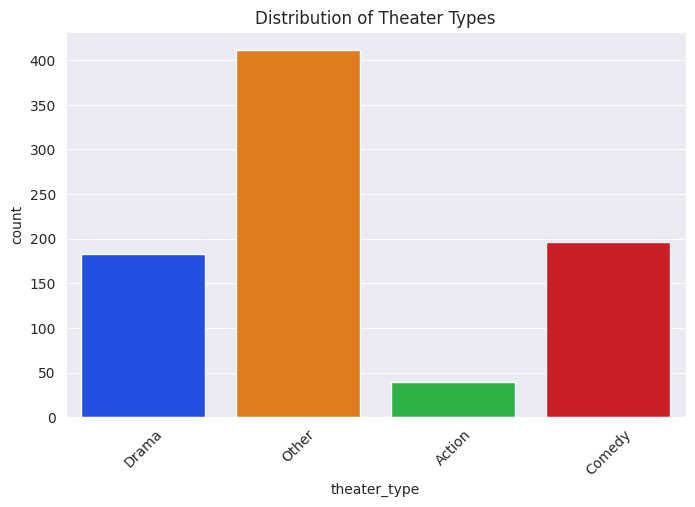

In [33]:
# Bar plot for theater_types
plt.figure(figsize=(8,5))
plt.style.use('dark_background')
sns.set_style("darkgrid")     
sns.countplot(data=booknow_T, x='theater_type', palette='bright')
plt.title('Distribution of Theater Types')
plt.xticks(rotation=45)
plt.show()

# *Observations from the Chart*

- "Other" category has the highest count (around 400+), making it the most dominant theater type.

- Comedy and Drama have moderate counts (roughly 180–200 each), indicating a good level of audience interest or show availability.

- Action has the lowest representation (around 40), suggesting limited availability or lower demand in that category.

## Possible Real-World Interpretations

- The dominance of “Other” suggests that your dataset includes a large variety of theater formats or genres not strictly classified under Drama, Comedy, or Action. This could mean:

- A wide range of experimental or regional performances,

Or a dataset grouping smaller categories (like musical, romance, thriller, etc.) under "Other".

- The strong presence of Comedy and Drama reflects audience preference for emotionally engaging and entertaining performances—genres that appeal to a broad demographic.

- The low number of Action shows may indicate that action-based theater is less common, likely due to higher production costs or lower demand in live-performance settings compared to film.

## Deeper Insights & Business Implications

- **Programming & Scheduling:**
    - Theaters can plan more Comedy and Drama shows, which appear to have steady participation.

- **Audience Targeting:**
    - Marketing efforts can focus on Comedy and Drama fans, who form a larger part of the audience.

- **Diversification Opportunity:**
    - The low number of Action or niche categories presents an opportunity to experiment with new formats to attract untapped audiences.

- **Data Quality Note:**
    - The high count of “Other” may also signal categorization inconsistency — you might want to revisit data labeling to ensure that unique genres are not over-grouped.


---
# *Selecting top 10 theater type and visualising it through bar chart.*
---


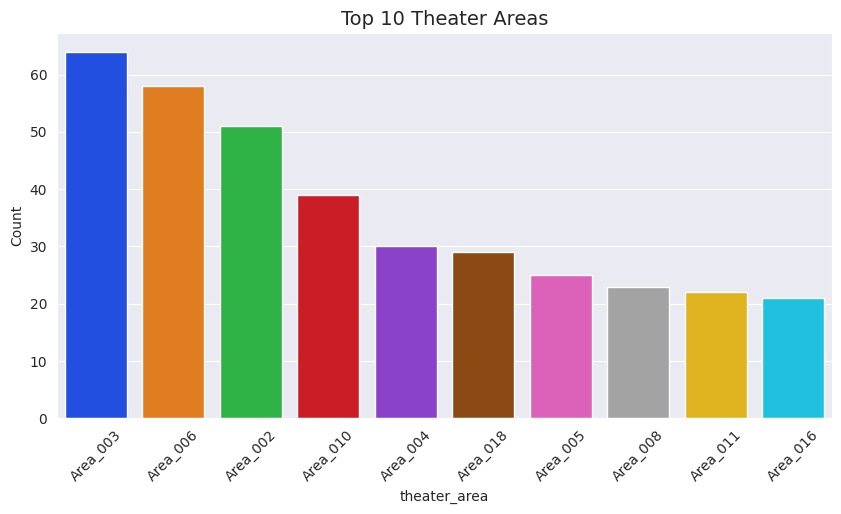

In [34]:
# I am selecting top 10 theatre areas 
import matplotlib.pyplot as plt
import seaborn as sns
top_10 = booknow_T['theater_area'].value_counts().nlargest(10)  # top 10 areas
plt.figure(figsize=(10,5))
sns.barplot(x=top_10.index, y=top_10.values, palette='bright')
plt.title('Top 10 Theater Areas', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# *Analysis: Top 10 Theater Areas-*

- Area_003 leads with the highest count (~64), indicating it has the largest theater presence or highest activity level among all areas.

- Area_006 and Area_002 follow closely, showing strong theater concentration and possibly higher audience engagement in these regions.

- Area_010 and Area_004 have moderate counts, suggesting steady but lower activity compared to the top three.

- Areas 018, 005, 008, 011, and 016 have relatively lower counts, indicating fewer theaters or less frequent events.

### Insights

- The data suggests theater activity is unevenly distributed, with a few key areas (003, 006, 002) acting as major entertainment hubs.

- hese areas could represent high-demand urban or commercial zones, while the others might be smaller or developing regions.

- From a business standpoint, focusing marketing, promotions, or new releases in top-performing areas could yield the best audience reach.

- Meanwhile, expanding infrastructure or events in lower-ranked areas (like Area_008 or Area_016) could help balance theater accessibility and grow audience diversity.

In [35]:
# 4.b) Numeric Columns: latitude, longitude
print("Summary statistics for latitude and longitude")
print('\n')
print(booknow_T[['latitude', 'longitude']].describe())

Summary statistics for latitude and longitude


         latitude   longitude
count  829.000000  829.000000
mean    23.000000   79.000000
std      0.833863    1.460388
min     22.025970   76.112098
25%     22.619233   78.170501
50%     23.004410   79.908065
75%     23.018784   79.934515
max     26.349436   81.743235


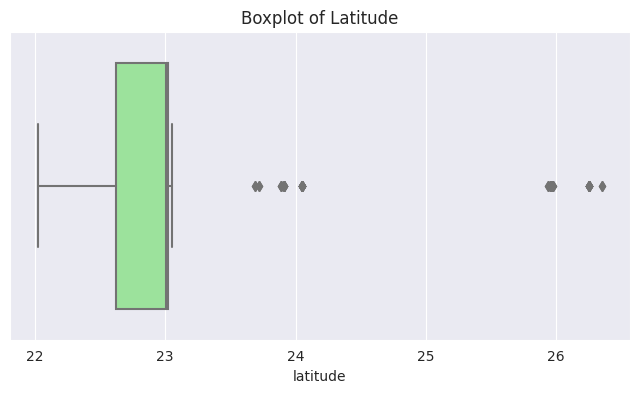

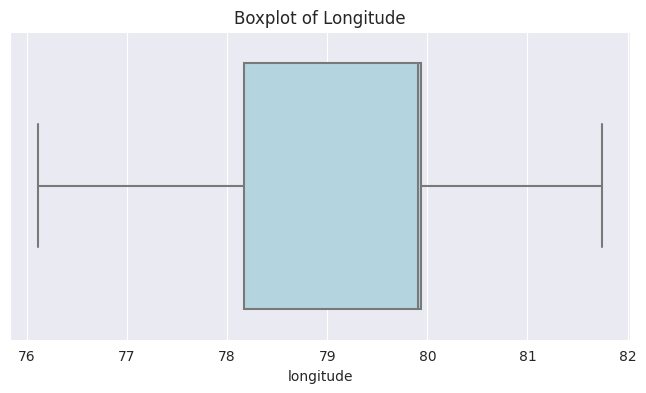

In [36]:
# Boxplots to detect outliers
plt.figure(figsize=(8,4))
sns.boxplot(x='latitude', data=booknow_T, color='lightgreen')
plt.title('Boxplot of Latitude')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='longitude', data=booknow_T, color='lightblue')
plt.title('Boxplot of Longitude')
plt.show()

In [37]:
# Basically I am going to drop this outliers from my dataset, because it is not useful.
import pandas as pd
numeric_cols = ['latitude', 'longitude']
def remove_outliers(booknow_T, cols):
    for col in cols:
        Q1 = booknow_T[col].quantile(0.25)
        Q3 = booknow_T[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        booknow_T = booknow_T[(booknow_T[col] >= lower_bound) & (booknow_T[col] <= upper_bound)]
    return booknow_T
booknow_T= remove_outliers(df, numeric_cols)
print(booknow_T.shape)

(752, 5)


# *Bivariate Analysis*

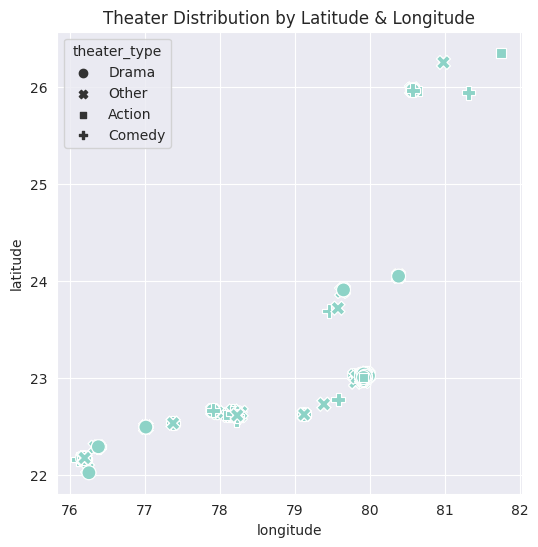

In [38]:
# 2. Scatter plot: Latitude vs Longitude
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='longitude', y='latitude', style='theater_type', s=100)
plt.title("Theater Distribution by Latitude & Longitude")
plt.show()

## Inference

- Each point represents a theater, located by its latitude (Y-axis) and longitude (X-axis).

- Marker shapes indicate the type of theater (Drama, Action, Comedy, Other).

## Clustering of points suggests that:

- Theaters are concentrated in certain latitude–longitude zones — likely major urban or populated areas.

- Sparse regions between clusters could represent rural or less populated zones with fewer theaters.

- If certain symbols (like “Action” or “Comedy”) dominate particular clusters, it means those areas prefer certain genres more.

- The latitude range (22–26°) and longitude range (76–82°) suggest the dataset covers a specific region, possibly within one Indian state or region.

# *4.cinePOS_B Datasets*

In [39]:
# Checking the shape of the cinePOS_B Datasets. 
cinePOS_B.shape

(1641966, 4)

In [40]:
# Let's see the sample of the dataset:
cinePOS_B.sample(5)


,cine_theater_id,show_datetime,booking_datetime,tickets_sold
324871,cinePOS_08455,2023-04-29 19:00:00,2023-04-29 14:00:00,3
119006,cinePOS_05467,2023-02-21 11:00:00,2023-02-08 00:00:00,2
298106,cinePOS_06645,2023-04-22 18:00:00,2023-04-16 15:00:00,2
226591,cinePOS_04665,2023-03-26 19:00:00,2023-03-25 21:00:00,2
1375114,cinePOS_11779,2024-01-08 18:00:00,2024-01-07 09:00:00,2


In [41]:
# Let's see the details and about the datasets:
cinePOS_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641966 entries, 0 to 1641965
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cine_theater_id   1641966 non-null  object
 1   show_datetime     1641966 non-null  object
 2   booking_datetime  1641966 non-null  object
 3   tickets_sold      1641966 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 50.1+ MB


In [42]:
# 1.Numerical columns
print("Descriptive statistics for numerical columns:")
print(cinePOS_B.describe())
print('\n')
# 2. Categorical columns
print("Descriptive statistics for categorical columns:")
print(cinePOS_B.describe(include=['object', 'category']))

Descriptive statistics for numerical columns:
       tickets_sold
count  1.641966e+06
mean   4.987345e+00
std    5.234901e+00
min    1.000000e+00
25%    2.000000e+00
50%    3.000000e+00
75%    6.000000e+00
max    1.000000e+02


Descriptive statistics for categorical columns:
       cine_theater_id        show_datetime     booking_datetime
count          1641966              1641966              1641966
unique           13161                 8283                10152
top      cinePOS_03019  2023-12-16 19:00:00  2023-12-12 21:00:00
freq               921                10528                  907


In [43]:
# Check for missing values and Duplicates
print("Missing values_checking:")
print(cinePOS_B.isnull().sum())
print("Number of duplicated rows:", cinePOS_B.duplicated().sum())
if cinePOS_B.duplicated().sum() > 0:
    print("Duplicated rows:")
    print(cinePOS_B[cinePOS_B.duplicated()])

Missing values_checking:
cine_theater_id     0
show_datetime       0
booking_datetime    0
tickets_sold        0
dtype: int64
Number of duplicated rows: 12541
Duplicated rows:
        cine_theater_id        show_datetime     booking_datetime  \
62        cinePOS_00056  2023-01-01 18:00:00  2023-01-01 00:00:00   
235       cinePOS_00202  2023-01-02 17:00:00  2023-01-01 16:00:00   
478       cinePOS_00230  2023-01-02 18:00:00  2023-01-01 00:00:00   
518       cinePOS_00237  2023-01-02 18:00:00  2023-01-01 12:00:00   
700       cinePOS_00555  2023-01-02 19:00:00  2023-01-01 13:00:00   
...                 ...                  ...                  ...   
1641537   cinePOS_01803  2024-02-28 20:00:00  2024-02-08 22:00:00   
1641545   cinePOS_05678  2024-02-28 20:00:00  2024-02-28 07:00:00   
1641851   cinePOS_02510  2024-02-28 21:00:00  2024-02-26 21:00:00   
1641890   cinePOS_00406  2024-02-28 21:00:00  2024-02-28 07:00:00   
1641960   cinePOS_07214  2024-02-28 23:00:00  2024-02-27 10:00:00

In [44]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cinePOS_B['show_datetime'] = pd.to_datetime(cinePOS_B['show_datetime'])
cinePOS_B['booking_datetime'] = pd.to_datetime(cinePOS_B['booking_datetime'])

In [45]:
# Step 6: Creating new features
cinePOS_B['booking_to_show_days'] = (cinePOS_B['show_datetime'] - cinePOS_B['booking_datetime']).dt.days
cinePOS_B['show_hour'] = cinePOS_B['show_datetime'].dt.hour
cinePOS_B['show_weekday'] = cinePOS_B['show_datetime'].dt.day_name()
cinePOS_B['booking_weekday'] = cinePOS_B['booking_datetime'].dt.day_name()

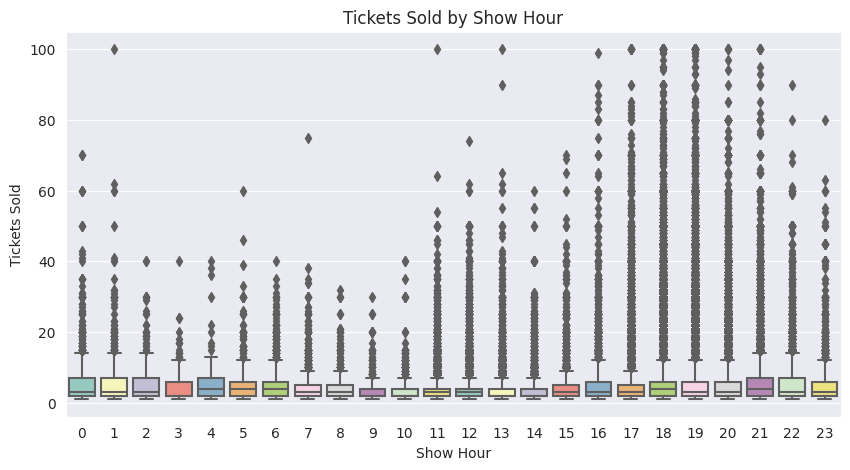

In [46]:
# Tickets sold by show hour
plt.figure(figsize=(10,5))
sns.boxplot(x='show_hour', y='tickets_sold', data=cinePOS_B, palette='Set3')
plt.title('Tickets Sold by Show Hour')
plt.xlabel('Show Hour')
plt.ylabel('Tickets Sold')
plt.show()

# *General Sales Trends*
- Peak Sales Hours: The majority of shows with high ticket sales occur in the late afternoon and evening, specifically from 16:00 (4 PM) to 21:00 (9 PM). During these hours, the median (the line inside the box) and the interquartile range (IQR - the box itself) are generally higher and exhibit a wider spread, indicating a greater number of tickets sold on average and more variability in high-performing shows.

- Low Sales Hours: Ticket sales are significantly lower in the early morning and midday, from 0:00 (12 AM) to about 15:00 (3 PM). For these hours, the median is very close to zero, and the entire box is compressed, meaning that for most show instances, very few tickets (often less than 5) are sold.

- Outliers (Max Sales): The absolute maximum number of tickets sold (the highest outlier points) is consistent across most hours, reaching up to 100 tickets (or the maximum value shown on the y-axis), indicating that even during low-sales hours, there are occasional instances of a full or nearly full show.

# Distribution and Variability
- Most Predictable (Low Variability): The sales distribution for early morning hours (e.g., 0:00 to 14:00) is the most compact (the box and whiskers are shortest). This suggests that show sales during this time are generally consistently low, making them the most predictable, albeit for a low volume.

- Most Variable (High Variability): The sales distribution from 16:00 to 21:00 is the most dispersed (the box and whiskers are longest). This indicates the highest variability in ticket sales: some shows in this window perform moderately well (median is high), while others perform exceptionally well (the box and whiskers stretch higher).

# Median Sales (Typical Performance):

- The median tickets sold for hours 0:00 through 14:00 is approximately 1-2 tickets.

- The median tickets sold for the peak hour window 16:00 through 21:00 is generally 3-5 tickets, with the peak median perhaps around 19:00.

# Specific Hours
- Highest Median/IQR: 19:00 (7 PM) appears to be the most critical hour, as it generally has one of the highest medians and the largest interquartile range (IQR), indicating this is the most consistently busy hour for ticket sales.

- Late Night: After 21:00 (9 PM), sales drop off rapidly, with the median and IQR for 22:00 and 23:00 returning to levels similar to the afternoon hours, but still showing very high maximum outlier values.

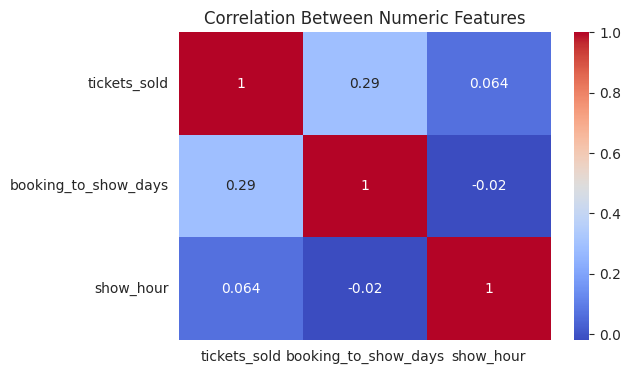

In [47]:
#Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cinePOS_B[['tickets_sold','booking_to_show_days','show_hour']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


- Summary of FindingsThe strongest, though still only moderate, predictive relationship is that shows booked further in advance tend to sell more tickets overall ($\text{r} = 0.29$).
- The relationships involving show_hour are negligibly weak ($\text{r} = 0.064$ and $\text{r} = -0.02$). This means that the actual time of day is not linearly correlated with total sales or advance booking time.

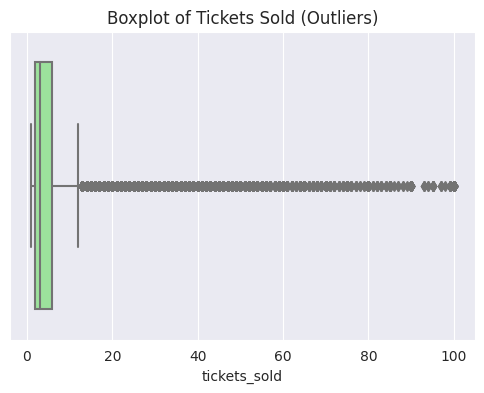

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x=cinePOS_B['tickets_sold'], color='lightgreen')
plt.title('Boxplot of Tickets Sold (Outliers)')
plt.show()

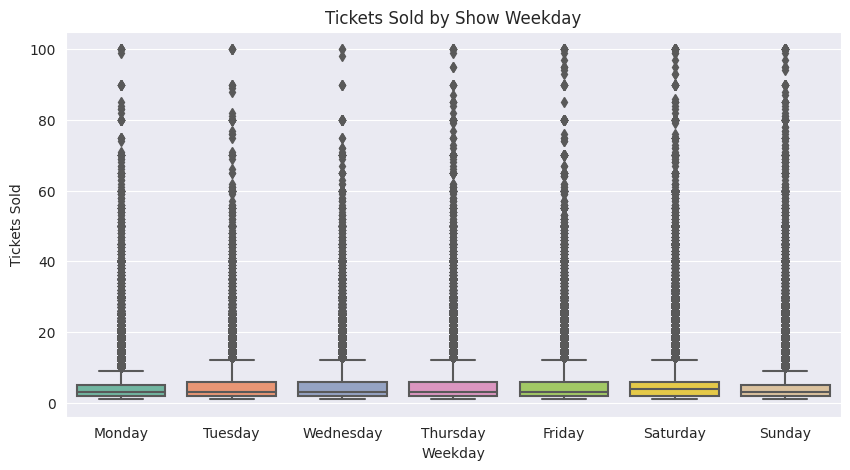

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x='show_weekday', y='tickets_sold', data=cinePOS_B, palette='Set2', 
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Tickets Sold by Show Weekday')
plt.xlabel('Weekday')
plt.ylabel('Tickets Sold')
plt.show()


# =========================================================================================================================================================
# *5. cinePOS_T Datasets*
# =========================================================================================================================================================

In [50]:
# Checking the shape of the cinePOS_T Datasets. 
cinePOS_T.shape

(4690, 5)

In [51]:
# 1.Numerical columns
print("Descriptive statistics for numerical columns:")
print(cinePOS_T.describe())
print('\n')
# 2. Categorical columns
print("Descriptive statistics for categorical columns:")
print(cinePOS_T.describe(include=['object', 'category']))

Descriptive statistics for numerical columns:
         latitude   longitude
count  829.000000  829.000000
mean    23.000000   79.000000
std      0.833863    1.460388
min     22.025970   76.112098
25%     22.619233   78.170501
50%     23.004410   79.908065
75%     23.018784   79.934515
max     26.349436   81.743235


Descriptive statistics for categorical columns:
       cine_theater_id theater_type theater_area
count             4690         4690         4690
unique            4690            3          119
top      cinePOS_05466        Other     Area_119
freq                 1         3941          257


In [52]:
# Let's see the details and about the datasets:
cinePOS_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cine_theater_id  4690 non-null   object 
 1   theater_type     4690 non-null   object 
 2   theater_area     4690 non-null   object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [53]:
# Check for missing values and Duplicates
print("Missing values_checking:")
print(cinePOS_T.isnull().sum())
print("Number of duplicated rows:", cinePOS_T.duplicated().sum())
if cinePOS_T.duplicated().sum() > 0:
    print("Duplicated rows:")
    print(cinePOS_T[cinePOS_T.duplicated()])

Missing values_checking:
cine_theater_id       0
theater_type          0
theater_area          0
latitude           3861
longitude          3861
dtype: int64
Number of duplicated rows: 0


# *5.1 Strategy to fill the missings of CinePOS_T*

In [54]:
import pandas as pd
cine_coords = pd.merge(MTID_R, booknow_T[['book_theater_id', 'latitude', 'longitude']],
                       on='book_theater_id', how='left')
cine_coords = cine_coords.groupby('cine_theater_id')[['latitude', 'longitude']].mean().reset_index()
cinePOS_T_filled = pd.merge(cinePOS_T, cine_coords, on='cine_theater_id', how='left', suffixes=('', '_from_book'))
cinePOS_T_filled['latitude'] = cinePOS_T_filled['latitude'].fillna(cinePOS_T_filled['latitude_from_book'])
cinePOS_T_filled['longitude'] = cinePOS_T_filled['longitude'].fillna(cinePOS_T_filled['longitude_from_book'])
cinePOS_T_filled = cinePOS_T_filled.drop(columns=['latitude_from_book', 'longitude_from_book'])
area_coords = booknow_T.groupby('theater_area')[['latitude', 'longitude']].mean().reset_index()
cinePOS_T_filled = pd.merge(cinePOS_T_filled, area_coords, on='theater_area', how='left', suffixes=('', '_area'))
cinePOS_T_filled['latitude'] = cinePOS_T_filled['latitude'].fillna(cinePOS_T_filled['latitude_area'])
cinePOS_T_filled['longitude'] = cinePOS_T_filled['longitude'].fillna(cinePOS_T_filled['longitude_area'])
cinePOS_T_filled = cinePOS_T_filled.drop(columns=['latitude_area', 'longitude_area'])
type_coords = booknow_T.groupby('theater_type')[['latitude', 'longitude']].mean().reset_index()
cinePOS_T_filled = pd.merge(cinePOS_T_filled, type_coords, on='theater_type', how='left', suffixes=('', '_type'))
cinePOS_T_filled['latitude'] = cinePOS_T_filled['latitude'].fillna(cinePOS_T_filled['latitude_type'])
cinePOS_T_filled['longitude'] = cinePOS_T_filled['longitude'].fillna(cinePOS_T_filled['longitude_type'])
cinePOS_T_filled = cinePOS_T_filled.drop(columns=['latitude_type', 'longitude_type'])
print(cinePOS_T_filled.isna().sum())

cine_theater_id    0
theater_type       0
theater_area       0
latitude           0
longitude          0
dtype: int64


This Python code block is performing a series of steps to **impute (fill in)** missing `latitude` and `longitude` values in the `cinePOS_T` DataFrame using coordinate data from other related tables (`MTID_R` and `booknow_T`).

The imputation process follows a specific hierarchy: **Theater ID** -> **Theater Area** -> **Theater Type**.

# *Why This Strategy Is Good*
-  Avoids using global mean (which would distort location data)
-  Uses progressively wider groups (hierarchical approach)
-  Maintains geographic consistency within area/type
-  Reduces noise and improves model quality
-  Works well when some groups have very few observations

In [55]:
cinePOS_T = cinePOS_T_filled

In [56]:
cinePOS_T.sample(10)

,cine_theater_id,theater_type,theater_area,latitude,longitude
136,cinePOS_03056,Other,Area_107,23.005894,79.915496
4493,cinePOS_11268,Other,Area_110,22.784872,78.891519
2177,cinePOS_11852,Drama,Area_118,22.833155,79.118354
2355,cinePOS_01838,Drama,Area_132,22.833155,79.118354
3783,cinePOS_13197,Other,Area_134,22.784872,78.891519
2664,cinePOS_07570,Drama,Area_169,22.833155,79.118354
4585,cinePOS_07558,Other,Area_144,22.784872,78.891519
2555,cinePOS_12817,Drama,Area_148,22.833155,79.118354
57,cinePOS_13040,Other,Area_009,22.997768,79.913144
2139,cinePOS_12551,Drama,Area_112,22.833155,79.118354


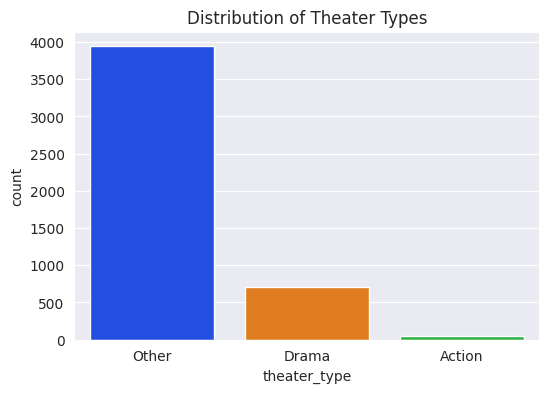

In [57]:
# Theater type distributions
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=cinePOS_T, x='theater_type', palette='bright')
plt.title('Distribution of Theater Types')
plt.show()

This chart is a **Count Plot** showing the absolute frequency (count) of different **Theater Types** in the dataset.

Here are the key inferences we can draw from the plot: 

## *Distribution of Theater Types*

---

### 1. Dominance of 'Other'

* The category **'Other'** is by far the most dominant theater type, with a count close to **4,000** instances.
* **Inference:** This suggests that the vast majority of shows or theater-related events in this dataset fall into a category that is not explicitly labeled as 'Drama' or 'Action'. This could represent general-purpose cinema screenings, standard movie theaters, or a broad category of non-genre-specific theaters.

### 2. Frequency of 'Drama'

* The **'Drama'** theater type is the second most frequent, with a count of approximately **700 to 750** instances.
* **Inference:** While significantly less frequent than 'Other', 'Drama' is still a major, distinguishable category and is much more common than the 'Action' type.

### 3. Rarity of 'Action'

* The **'Action'** theater type is the **least frequent** category, with a count that appears to be **less than 100** instances (barely visible above the x-axis).
* **Inference:** 'Action' theaters or shows represent a very small portion of the overall data distribution.

### 4. Overall Distribution

* The distribution is **highly skewed**. If the total number of entries is approximately 4,800 (4,000 + 750 + 50), the approximate breakdown is:
    * **'Other'**: $\approx 83\%$
    * **'Drama'**: $\approx 15.6\%$
    * **'Action'**: $\approx 1\%$

> **Conclusion:** The dataset is heavily dominated by the 'Other' category, suggesting that the analysis of sales and booking patterns will be primarily driven by this general type of theater. Any conclusions drawn specifically for 'Drama' or 'Action' theaters would be based on a much smaller sample size.

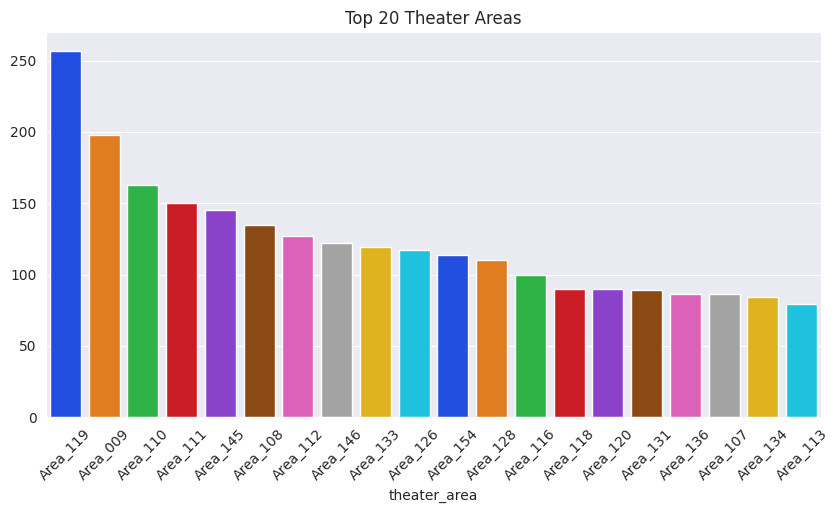

In [58]:
# Count plot for theater_area top 20 i am considering.....
top_areas = cinePOS_T['theater_area'].value_counts().head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=top_areas.index, y=top_areas.values, palette='bright')
plt.title('Top 20 Theater Areas')
plt.xticks(rotation=45)
plt.show()


This chart is a **Bar Chart** showing the absolute frequency (count) of the **Top 20 Theater Areas** in the dataset.

Here are the key inferences we can draw from the plot: 

## *Distribution of Top 20 Theater Areas*

---

### 1. Dominance of Area\_119

* **Area\_119** is the most frequent area, with a count of approximately **255** instances.
* **Inference:** This area contributes the largest single share of data points to the dataset, suggesting it is either the busiest theater area or is heavily overrepresented in the source data compared to all others.

### 2. Concentration in Top 5

* The top five areas—**Area\_119**, **Area\_009** ($\approx 200$), **Area\_110** ($\approx 160$), **Area\_111** ($\approx 150$), and **Area\_145** ($\approx 140$)—show significantly higher counts than the remaining areas.
* **Inference:** The activity or reporting is heavily concentrated in these five locations, which will disproportionately influence any overall analysis of geographic trends.

### 3. Steep Drop-off and Low-End Uniformity

* There is a clear drop-off after the top five, with counts settling into a tighter range of approximately **100 to 130** for areas like Area\_108 through Area\_126.
* Towards the bottom of the Top 20, the counts become relatively uniform, hovering around **80** (e.g., Area\_107, Area\_134, Area\_113).
* **Inference:** While the top areas are diverse, the remaining areas contribute a more consistent, but lower, volume of data points.

> **Conclusion:** The dataset is highly skewed toward the top theater areas, particularly Area\_119. This geographic concentration must be considered when drawing conclusions about theater performance, as the findings may be heavily localized to a few high-volume areas.

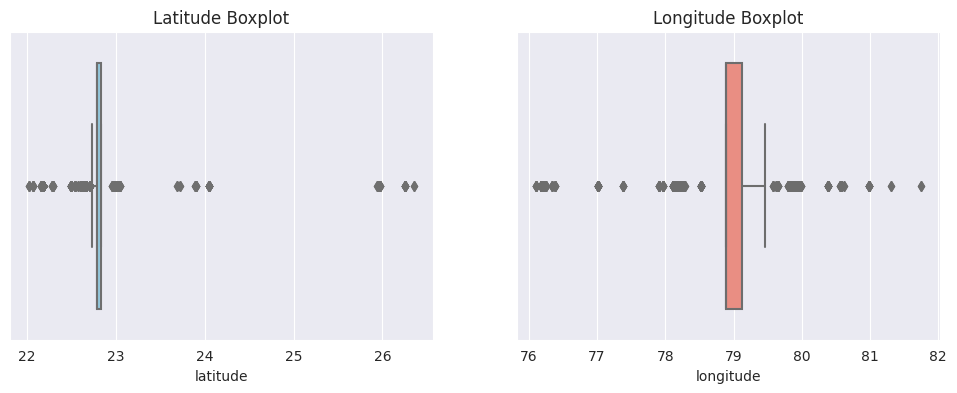

In [59]:
# Boxplots to check for outliers
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=cinePOS_T['latitude'], color='skyblue')
plt.title('Latitude Boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=cinePOS_T['longitude'], color='salmon')
plt.title('Longitude Boxplot')
plt.show()

In [60]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
latitude_outliers = detect_outliers(cinePOS_T, 'latitude')
print('Number of outliers in latititude:', len(latitude_outliers))
print('')
longitude_outliers = detect_outliers(cinePOS_T, 'longitude')
print('Number of outliers in longitude:', len(longitude_outliers))

Number of outliers in latititude: 1257

Number of outliers in longitude: 1243


# =========================================================================================================================================================
# *6. Booknow_visits Datasets.*
# =========================================================================================================================================================

In [61]:
# Checking the shape of the booknow_visits Datasets. 
booknow_visits.shape

(214046, 3)

In [62]:
# Let's see how the data looks 
booknow_visits.sample(10)

,book_theater_id,show_date,audience_count
57258,book_00221,2023-04-06,44
20042,book_00082,2023-11-09,30
200209,book_00776,2023-04-12,28
125453,book_00490,2023-08-19,84
121176,book_00471,2024-01-28,20
42955,book_00167,2024-01-13,18
45178,book_00176,2023-02-27,66
71800,book_00279,2023-10-23,60
139704,book_00547,2023-09-09,60
90298,book_00352,2023-09-10,16


In [63]:
# Let's see the details and about the datasets:
booknow_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_count   214046 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [64]:
# 1.Numerical columns
print("Descriptive statistics for numerical columns:")
print(booknow_visits.describe())
print('\n')
# 2. Categorical columns
print("Descriptive statistics for categorical columns:")
print(booknow_visits.describe(include=['object', 'category']))

Descriptive statistics for numerical columns:
       audience_count
count   214046.000000
mean        41.616568
std         32.834918
min          2.000000
25%         18.000000
50%         34.000000
75%         58.000000
max       1350.000000


Descriptive statistics for categorical columns:
       book_theater_id   show_date
count           214046      214046
unique             826         424
top         book_00528  2023-11-18
freq               424         783


In [65]:
# Check for missing values and Duplicates
print("Missing values_checking:")
print(booknow_visits.isnull().sum())
print("Number of duplicated rows:", booknow_visits.duplicated().sum())
if booknow_visits.duplicated().sum() > 0:
    print("Duplicated rows:")
    print(booknow_visits[booknow_visits.duplicated()])

Missing values_checking:
book_theater_id    0
show_date          0
audience_count     0
dtype: int64
Number of duplicated rows: 10
Duplicated rows:
       book_theater_id   show_date  audience_count
5149        book_00021  2023-02-28              24
19437       book_00081  2023-02-28              10
20191       book_00083  2023-02-28              26
24642       book_00099  2023-02-28               4
53008       book_00205  2023-02-28               4
92651       book_00362  2023-02-28              26
137766      book_00540  2023-02-28              18
158355      book_00617  2023-02-28               4
160652      book_00627  2023-02-28              24
207719      book_00806  2023-02-28              28


In [66]:
# Here I am Droping duplicates
booknow_visits = booknow_visits.drop_duplicates().reset_index(drop=True)
print(booknow_visits.duplicated().sum())


0


In [67]:
booknow_visits

,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12
...,...,...,...
214031,book_00829,2024-02-23,16
214032,book_00829,2024-02-24,8
214033,book_00829,2024-02-25,16
214034,book_00829,2024-02-27,16


# =========================================================================================================================================================
# *6.1 Univariate Analysis*
# =========================================================================================================================================================

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


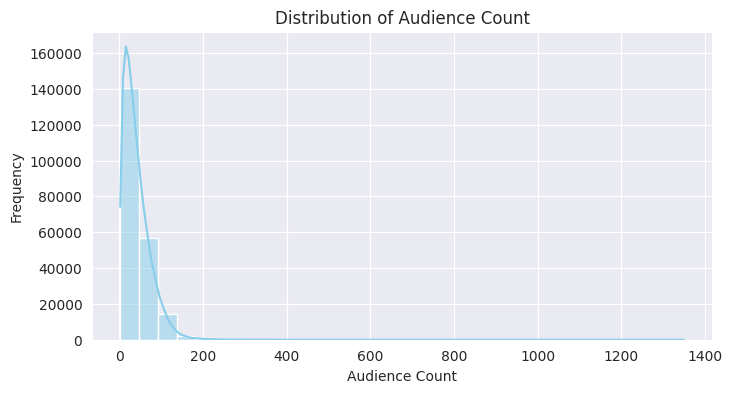

In [68]:
# Audience count distribution
plt.figure(figsize=(8,4))
clean_audience = booknow_visits['audience_count'].replace([np.inf, -np.inf], np.nan).dropna()
sns.histplot(clean_audience, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Audience Count')
plt.xlabel('Audience Count')
plt.ylabel('Frequency')
plt.show()

I will provide the interpretation for the newly uploaded chart, "Distribution of Audience Count," and then a summary combining all five charts.

## *5. Distribution of Audience Count (Histogram/KDE Plot)*

This chart shows the frequency distribution of the **Audience Count**.

### Key Inferences

* **Extreme Right Skewness:** The distribution is **severely right-skewed** (positively skewed).
* **Mode at Low Count:** The mode (peak frequency) is extremely close to **0**, specifically in the **0-20** audience count range, with a frequency of around **160,000** instances.
* **Low Attendance Dominance:** This indicates that the **overwhelming majority** of shows or events in the dataset have a **very low audience count**, suggesting most screenings are nearly empty.
* **Rarity of High Attendance:** Frequencies drop off rapidly. High audience counts (e.g., above 200, extending up to 1,400) are extremely rare and represent significant outliers.

> **Conclusion:** The typical show in this dataset is **poorly attended**. High-attendance events are rare successes.

---

## Comprehensive Summary of All Chart Inferences

Your analysis across all five charts reveals a consistent picture of low typical performance and high data concentration:

| Chart | Variable(s) | Key Inference |
| :--- | :--- | :--- |
| **Tickets Sold by Show Hour** | `tickets_sold` vs. `show_hour` | **Peak Sales** (median $\approx$ 3-5 tickets) occur in the evening (17:00-21:00), but overall attendance is low. |
| **Correlation Heatmap** | `tickets_sold`, `booking_to_show_days` | A **weak positive correlation (0.29)** exists between **advance booking time** and **total tickets sold**. |
| **Distribution of Theater Types** | `theater_type` | The dataset is heavily dominated by the **'Other'** theater type ($\approx 83\%$). |
| **Top 20 Theater Areas** | `theater_area` | The data is geographically concentrated, with **Area\_119** being the most frequent contributor. |
| **Distribution of Audience Count** | `audience_count` | The **vast majority** of shows have an audience count between **0 and 20**. |

> **Overall Takeaway:** The typical show in this data is a low-volume, poorly attended event, often classified as 'Other' type, and heavily concentrated in a few specific geographic areas (like Area\_119). High-performing shows are statistically rare events.

In [69]:
# Check shape and datatypes
print(booknow_visits.shape)
print(booknow_visits.info())
print(booknow_visits.describe())

# Missing values
print(booknow_visits.isna().sum())

# Unique theaters
print("Unique theaters:", booknow_visits['book_theater_id'].nunique())


(214036, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214036 entries, 0 to 214035
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214036 non-null  object
 1   show_date        214036 non-null  object
 2   audience_count   214036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB
None
       audience_count
count   214036.000000
mean        41.617728
std         32.835180
min          2.000000
25%         18.000000
50%         34.000000
75%         58.000000
max       1350.000000
book_theater_id    0
show_date          0
audience_count     0
dtype: int64
Unique theaters: 826


In [70]:
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'], errors='coerce')
booknow_visits['year'] = booknow_visits['show_date'].dt.year
booknow_visits['month'] = booknow_visits['show_date'].dt.month
booknow_visits['day'] = booknow_visits['show_date'].dt.day
booknow_visits['weekday'] = booknow_visits['show_date'].dt.day_name()

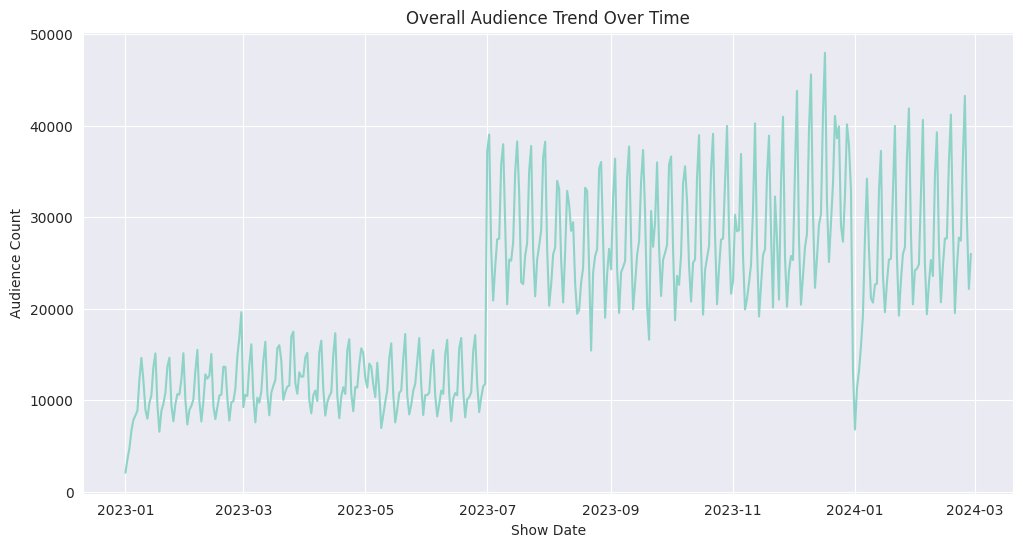

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
booknow_visits.replace([np.inf, -np.inf], np.nan, inplace=True)
aud_trend = booknow_visits.groupby('show_date')['audience_count'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(aud_trend['show_date'], aud_trend['audience_count'])
plt.title("Overall Audience Trend Over Time")
plt.xlabel('Show Date')
plt.ylabel('Audience Count')
plt.show()

I will provide the interpretation for the final chart, "Overall Audience Trend Over Time," and then a comprehensive summary combining all six charts you have uploaded.

# *Overall Audience Trend Over Time (Line Plot)*

This chart displays the time series trend of the total **Audience Count** from early 2023 to early 2024.

### Key Inferences

* **Structural Shift in Volume:** There is a distinct **step-change** around **July 2023**.
    * **Before July 2023:** Audience count fluctuated roughly between **8,000 and 17,000**.
    * **After July 2023:** Audience count significantly **increases**, fluctuating between **20,000 and 45,000**.
    * **Inference:** This suggests a major event (e.g., expansion of data source, change in reporting, or inclusion of a large number of new theaters/shows) that roughly **doubled the overall volume** of recorded audience activity.

* **Strong Seasonality:** The data exhibits a very clear and strong **weekly/daily cyclical pattern** throughout the entire period.
    * Sharp spikes followed by deep valleys indicate highly predictable **high- and low-attendance days** (likely weekends vs. weekdays).
    * **Inference:** Total audience count is highly dependent on the day of the week, with major surges during peak times.

* **Peak Activity and Anomaly:**
    * **Peak:** The highest spikes ($\approx 45,000$) occur near the end of **2023** (November/December), aligning with typical holiday seasonality.
    * **Anomaly:** A significant, sharp **V-shaped drop** occurs at the start of **January 2024**, temporarily reducing the count to the early 2023 baseline ($\approx 7,000$) before an immediate rebound. This is likely a temporary reporting error or system outage.

---


# =========================================================================================================================================================
# *7. Booknow_B Datasets.*
# =========================================================================================================================================================

In [72]:
# Checking the shape of the booknow_visits Datasets. 
booknow_B.shape

(68336, 4)

In [73]:
# Let's see how the data looks 
booknow_B.sample(10)

,book_theater_id,show_datetime,booking_datetime,tickets_booked
13637,book_00698,2023-05-21 20:00:00,2023-05-20 18:00:00,2
23940,book_00372,2023-11-18 18:00:00,2023-11-14 22:00:00,3
46336,book_00091,2024-01-06 16:00:00,2023-12-26 21:00:00,13
39657,book_00625,2023-12-23 17:00:00,2023-12-20 17:00:00,2
6671,book_00511,2023-03-14 19:00:00,2023-03-14 17:00:00,2
2715,book_00106,2023-02-05 16:00:00,2023-01-28 16:00:00,4
30924,book_00359,2023-12-05 22:00:00,2023-11-29 14:00:00,3
64877,book_00116,2024-02-20 21:00:00,2024-02-17 22:00:00,2
8891,book_00376,2023-04-01 18:00:00,2023-03-07 14:00:00,7
44779,book_00405,2023-12-30 18:00:00,2023-12-03 15:00:00,9


In [74]:
# Checking Duplicates  and missing values
print(booknow_B.isnull().sum())
print('')
print(booknow_B.duplicated().sum())

book_theater_id     0
show_datetime       0
booking_datetime    0
tickets_booked      0
dtype: int64

2042


In [75]:
# 1.Numerical columns
print("Descriptive statistics for numerical columns:")
print(booknow_B.describe())
print('\n')
# 2. Categorical columns
print("Descriptive statistics for categorical columns:")
print(booknow_B.describe(include=['object', 'category']))

Descriptive statistics for numerical columns:
       tickets_booked
count    68336.000000
mean         4.425808
std          4.808945
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        100.000000


Descriptive statistics for categorical columns:
       book_theater_id        show_datetime     booking_datetime
count            68336                68336                68336
unique             301                 3866                 6351
top         book_00712  2023-12-24 19:00:00  2023-11-24 18:00:00
freq              1832                  255                  106


In [76]:
booknow_B.shape

(68336, 4)

In [77]:
# Here I am checking the outliers count in the datasets..
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers 

tickets_outliers = detect_outliers(booknow_B, 'tickets_booked')
print("Number of outliers:", len(tickets_outliers))

Number of outliers: 5542


In [78]:
# Drop the outliers and overwrite the original dataset
booknow_B.drop(tickets_outliers.index, inplace=True)
print("New shape of dataset:", booknow_B.shape)

New shape of dataset: (62794, 4)


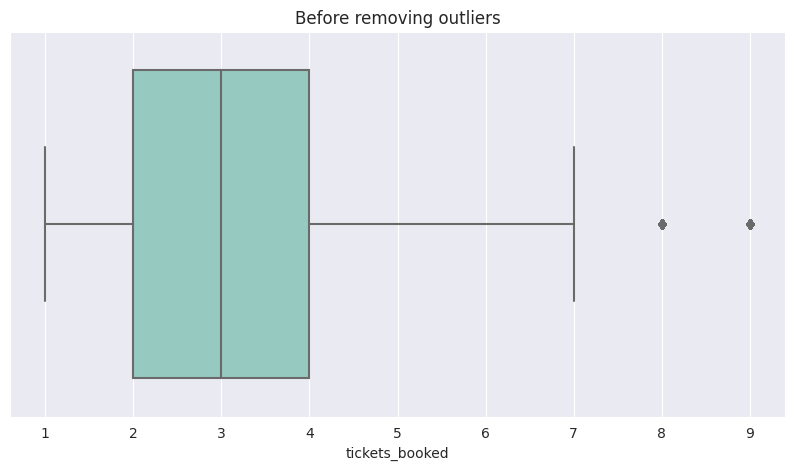

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=booknow_B['tickets_booked'])
plt.title("Before removing outliers")
plt.show()


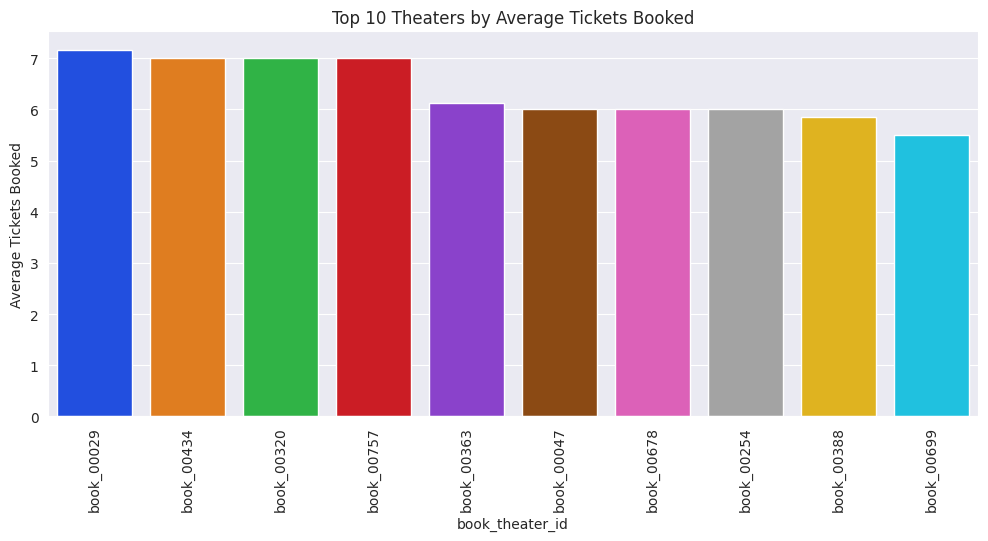

In [80]:
theater_avg = booknow_B.groupby('book_theater_id')['tickets_booked'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=theater_avg.index, y=theater_avg.values,palette='bright')
plt.xticks(rotation=90)
plt.title("Top 10 Theaters by Average Tickets Booked")
plt.ylabel("Average Tickets Booked")
plt.show()

In [81]:
MTID_R.head()

,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923
3,book_00094,cinePOS_02479
4,book_00052,cinePOS_06750


In [82]:
booknow_visits

,book_theater_id,show_date,audience_count,year,month,day,weekday
0,book_00001,2023-01-13,50,2023,1,13,Friday
1,book_00001,2023-01-14,64,2023,1,14,Saturday
2,book_00001,2023-01-15,58,2023,1,15,Sunday
3,book_00001,2023-01-16,44,2023,1,16,Monday
4,book_00001,2023-01-18,12,2023,1,18,Wednesday
...,...,...,...,...,...,...,...
214031,book_00829,2024-02-23,16,2024,2,23,Friday
214032,book_00829,2024-02-24,8,2024,2,24,Saturday
214033,book_00829,2024-02-25,16,2024,2,25,Sunday
214034,book_00829,2024-02-27,16,2024,2,27,Tuesday


# ===================================================================================================================================================
# Library importing here first
# ===================================================================================================================================================

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [84]:
df = booknow_visits.copy()
df['show_date'] = pd.to_datetime(df['show_date'])
df = df.sort_values(['book_theater_id', 'show_date'])

# ===================================================================================================================================================
# Data split and preparation of the data
# ===================================================================================================================================================

In [85]:
def train_test_split_per_theater(df, test_size=0.2):
    train_list, test_list = [], []
    for theater, g in df.groupby('book_theater_id'):
        g = g.sort_values('show_date')
        split_idx = int(len(g)*(1-test_size))
        train_list.append(g.iloc[:split_idx])
        test_list.append(g.iloc[split_idx:])
    return pd.concat(train_list).reset_index(drop=True), pd.concat(test_list).reset_index(drop=True)

# ===================================================================================================================================================
# Splitting process
# ===================================================================================================================================================

In [86]:
train_df, test_df = train_test_split_per_theater(df, test_size=0.2)

# ===================================================================================================================================================
# Rolling Preparation
# ===================================================================================================================================================

In [87]:
mean_df = train_df.groupby('book_theater_id')['audience_count'].mean().reset_index()
mean_df.rename(columns={'audience_count':'mean_per_booking'}, inplace=True)
train_df = train_df.merge(mean_df, on='book_theater_id', how='left')
test_df  = test_df.merge(mean_df, on='book_theater_id', how='left')

global_mean = train_df['audience_count'].mean()
test_df['mean_per_booking'] = test_df['mean_per_booking'].fillna(global_mean)

In [88]:
def rolling_windows(group):
    group = group.sort_values('show_date')
    for w in [7,30]:  # shorter, more stable windows
        group[f'rolling_{w}'] = group['audience_count'].shift(1).rolling(w, min_periods=1).mean()
    return group

In [89]:
train_df = train_df.groupby('book_theater_id', group_keys=False).apply(rolling_windows)
test_df  = test_df.groupby('book_theater_id', group_keys=False).apply(rolling_windows)

for w in [7,30]:
    last_train = train_df.groupby('book_theater_id')[f'rolling_{w}'].last()
    test_df[f'rolling_{w}'] = test_df.apply(
        lambda row: last_train.get(row['book_theater_id'], global_mean)
        if pd.isna(row[f'rolling_{w}']) else row[f'rolling_{w}'], axis=1
    )

for lag in [1,2]:
    train_df[f'lag_{lag}'] = train_df.groupby('book_theater_id')['audience_count'].shift(lag)
    test_df[f'lag_{lag}'] = test_df.groupby('book_theater_id')['audience_count'].shift(lag)
    last_train = train_df.groupby('book_theater_id')[f'lag_{lag}'].last()
    test_df[f'lag_{lag}'] = test_df.apply(
        lambda row: last_train.get(row['book_theater_id'], global_mean)
        if pd.isna(row[f'lag_{lag}']) else row[f'lag_{lag}'], axis=1
    )
# It is giving me some kind of warnings

/tmp/ipykernel_13/1552089338.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('book_theater_id', group_keys=False).apply(rolling_windows)
/tmp/ipykernel_13/1552089338.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df  = test_df.groupby('book_theater_id', group_keys=False).apply(rolling_windows)


# ===================================================================================================================================================
# Feature engineering 
# ===================================================================================================================================================

In [90]:
# Feature engineering part 1
train_df['weekday'] = train_df['show_date'].dt.day_name()
test_df['weekday']  = test_df['show_date'].dt.day_name()
train_df['month'] = train_df['show_date'].dt.month
test_df['month']  = test_df['show_date'].dt.month

le = LabelEncoder()
train_df['weekday_encoded'] = le.fit_transform(train_df['weekday'])
test_df['weekday_encoded'] = le.transform(test_df['weekday'])

features = ['mean_per_booking','weekday_encoded','month'] + \
           [f'rolling_{w}' for w in [7,30]] + \
           [f'lag_{lag}' for lag in [1,2]]

target = 'audience_count'

In [91]:
# Feature Engieneering Part 2
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]


In [92]:
# Model Selection 
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,           # shallower trees
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    reg_alpha=1,           # L1
    reg_lambda=1,          # L2
    objective='reg:squarederror',
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=20
)

[0]	validation_0-rmse:31.33431


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:26.08821
[40]	validation_0-rmse:24.03176
[60]	validation_0-rmse:23.24181
[80]	validation_0-rmse:22.91459
[100]	validation_0-rmse:22.74758
[120]	validation_0-rmse:22.66696
[140]	validation_0-rmse:22.61236
[160]	validation_0-rmse:22.59714
[180]	validation_0-rmse:22.57602
[200]	validation_0-rmse:22.56052
[220]	validation_0-rmse:22.54645
[240]	validation_0-rmse:22.54411
[260]	validation_0-rmse:22.55330
[280]	validation_0-rmse:22.55711
[292]	validation_0-rmse:22.55315


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# ===================================================================================================================================================
# Evaluation and scoring 
# ===================================================================================================================================================

In [93]:
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2  = r2_score(y_test, model.predict(X_test))
print("Training Complete!")
print("Train R²:", train_r2)
print("Test  R²:", test_r2)

Training Complete!
Train R²: 0.49664333328486254
Test  R²: 0.495246853403414


# ===================================================================================================================================================
# Submission Preparation 
# ===================================================================================================================================================

In [94]:
# So here first i have taken my submission file 
sample = Sample_submission.copy()
split_cols = sample['ID'].str.split('_', expand=True)
sample['book_theater_id'] = split_cols[0] + '_' + split_cols[1]
sample['show_date'] = pd.to_datetime(split_cols[2])

# we have to Merge mean_per_booking to all the sumission file 
sample = sample.merge(mean_df, on='book_theater_id', how='left')
sample['mean_per_booking'] = sample['mean_per_booking'].fillna(global_mean)

# after that i have done the Merge rolling features
rolling_df = pd.concat([train_df[['book_theater_id','show_date'] + [f'rolling_{w}' for w in [7,30]]],
                        test_df[['book_theater_id','show_date'] + [f'rolling_{w}' for w in [7,30]]]]).drop_duplicates()
sample = sample.merge(rolling_df, on=['book_theater_id','show_date'], how='left')
for w in [7,30]:
    last_train = train_df.groupby('book_theater_id')[f'rolling_{w}'].last()
    sample[f'rolling_{w}'] = sample.apply(
        lambda row: last_train.get(row['book_theater_id'], global_mean)
        if pd.isna(row[f'rolling_{w}']) else row[f'rolling_{w}'], axis=1
    )

# Once i did this i have taken Weekday & month code as per the feauteres has given to me 
sample['weekday'] = sample['show_date'].dt.day_name()
sample['month'] = sample['show_date'].dt.month
sample['weekday_encoded'] = le.transform(sample['weekday'])

# i also performe the Lag features here as  per the code has given 
for lag in [1,2]:
    last_train = train_df.groupby('book_theater_id')[f'lag_{lag}'].last()
    sample[f'lag_{lag}'] = sample['book_theater_id'].map(last_train).fillna(global_mean)

# then it is the time to Predict the code 
X_sub = sample[features]
sample['audience_count'] = np.round(model.predict(X_sub)).astype(int)

submission = sample[['ID','audience_count']]
submission.to_csv("submission.csv", index=False)
print("submission.csv saved successfully!")


submission.csv saved successfully!


In [95]:
# Here is the transformed data of cinePOS_T and MTID_R:
transformed_data= pd.merge(cinePOS_T, MTID_R[['book_theater_id', 'cine_theater_id']], 
                    on='cine_theater_id', how='left')
transformed_data.isnull().sum()

cine_theater_id       0
theater_type          0
theater_area          0
latitude              0
longitude             0
book_theater_id    4627
dtype: int64

# ***4. Merging the Data — Creating the Master Dataset***

## **Overview**
Now that each dataset has been thoroughly inspected, the next crucial step is to **combine them into a single, unified dataset**.  
This integration allows us to view the entire cinema ecosystem holistically — connecting audience visits, bookings, theater details, and calendar attributes into one analytical frame.

The goal here is to build a **final, clean, and analysis-ready dataset** that captures every relevant factor influencing audience attendance.

---

## **Why Merge the Data?**
Each dataset contributes a unique perspective:
- **CinePOS Booking** reveals ticket sales over time.  
- **BookNow Booking & Visits** provide audience behavior insights.  
- **Theater Metadata** (from both platforms) adds geographical and capacity details.  
- **Date Information** introduces temporal and seasonal context.  
- **Theater Relation Table** acts as the bridge between CinePOS and BookNow systems.

# =========================================================================================================================================================
# ***4.1. Aggregate BookNow Booking Data.***
# =========================================================================================================================================================

In [96]:
import pandas as pd
booknow_B['show_datetime'] = pd.to_datetime(booknow_B['show_datetime'])
booknow_B['booking_datetime'] = pd.to_datetime(booknow_B['booking_datetime'])
cinePOS_B['show_datetime'] = pd.to_datetime(cinePOS_B['show_datetime'])
cinePOS_B['booking_datetime'] = pd.to_datetime(cinePOS_B['booking_datetime'])
booknow_B['show_date'] = booknow_B['show_datetime'].dt.date
cinePOS_B['show_date'] = cinePOS_B['show_datetime'].dt.date
Date_info['show_date'] = pd.to_datetime(Date_info['show_date']).dt.date

In [97]:
booknow_B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62794 entries, 0 to 68335
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   book_theater_id   62794 non-null  object        
 1   show_datetime     62794 non-null  datetime64[ns]
 2   booking_datetime  62794 non-null  datetime64[ns]
 3   tickets_booked    62794 non-null  int64         
 4   show_date         62794 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 2.9+ MB


In [98]:
booknow_B.head()

,book_theater_id,show_datetime,booking_datetime,tickets_booked,show_date
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,2023-01-01
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3,2023-01-01
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6,2023-01-01
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2,2023-01-01
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5,2023-01-01


In [99]:
print('total shape of the cinePOS_B: ',cinePOS_B.shape)
print('total nulls in the ciinePOS_B: ',cinePOS_B.isnull().sum())

total shape of the cinePOS_B:  (1641966, 9)
total nulls in the ciinePOS_B:  cine_theater_id         0
show_datetime           0
booking_datetime        0
tickets_sold            0
booking_to_show_days    0
show_hour               0
show_weekday            0
booking_weekday         0
show_date               0
dtype: int64


## *Basically, I want group by the book_now with book theatre id and show data,*
## *I have to  arrange the "booknow_B" data based on the "Total ticked", for that particular ID on the particular Date.*

In [100]:
booknow_agg = booknow_B.groupby(['book_theater_id', 'show_date'])['tickets_booked'].sum().reset_index()

In [101]:
booknow_agg

,book_theater_id,show_date,tickets_booked
0,book_00013,2023-01-04,2
1,book_00013,2023-01-08,3
2,book_00013,2023-01-09,25
3,book_00013,2023-01-10,5
4,book_00013,2023-01-11,6
...,...,...,...
20220,book_00819,2024-02-19,18
20221,book_00819,2024-02-22,8
20222,book_00819,2024-02-26,4
20223,book_00819,2024-02-27,4


# =========================================================================================================================================================
# ***4.2. Aggregate CinemaPOS Booking Data.***
# =========================================================================================================================================================

In [102]:
cinePOS_B.shape

(1641966, 9)

In [103]:
cinePOS_agg = cinePOS_B.groupby(['cine_theater_id', 'show_date'])['tickets_sold'].sum().reset_index()

In [104]:
cinePOS_agg

,cine_theater_id,show_date,tickets_sold
0,cinePOS_00001,2023-01-01,1
1,cinePOS_00001,2023-01-08,1
2,cinePOS_00001,2023-01-23,5
3,cinePOS_00001,2023-01-24,5
4,cinePOS_00001,2023-01-28,3
...,...,...,...
1120076,cinePOS_13157,2024-02-28,2
1120077,cinePOS_13158,2024-02-28,4
1120078,cinePOS_13159,2024-02-28,7
1120079,cinePOS_13160,2024-02-28,6


In [105]:
# Checking the aggregates shape , duplicated and nulls.
print('Shape of the aggregate:',cinePOS_agg.shape)
print('SDupliated in the agg:',cinePOS_agg.duplicated().sum())
print('Total null in the cinePOS_agg:',cinePOS_agg.isnull().sum())

Shape of the aggregate: (1120081, 3)
SDupliated in the agg: 0
Total null in the cinePOS_agg: cine_theater_id    0
show_date          0
tickets_sold       0
dtype: int64


# =========================================================================================================================================================
# ***4.3. Merging the Datasets:***
# =========================================================================================================================================================

In [106]:
cinePOS_agg = cinePOS_agg.merge(MTID_R[['book_theater_id', 'cine_theater_id']], on='cine_theater_id', how='left')
cinePOS_agg

,cine_theater_id,show_date,tickets_sold,book_theater_id
0,cinePOS_00001,2023-01-01,1,NaN
1,cinePOS_00001,2023-01-08,1,NaN
2,cinePOS_00001,2023-01-23,5,NaN
3,cinePOS_00001,2023-01-24,5,NaN
4,cinePOS_00001,2023-01-28,3,NaN
...,...,...,...,...
1120076,cinePOS_13157,2024-02-28,2,NaN
1120077,cinePOS_13158,2024-02-28,4,NaN
1120078,cinePOS_13159,2024-02-28,7,NaN
1120079,cinePOS_13160,2024-02-28,6,NaN


In [107]:
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])

In [108]:
booknow_visits

,book_theater_id,show_date,audience_count,year,month,day,weekday
0,book_00001,2023-01-13,50,2023,1,13,Friday
1,book_00001,2023-01-14,64,2023,1,14,Saturday
2,book_00001,2023-01-15,58,2023,1,15,Sunday
3,book_00001,2023-01-16,44,2023,1,16,Monday
4,book_00001,2023-01-18,12,2023,1,18,Wednesday
...,...,...,...,...,...,...,...
214031,book_00829,2024-02-23,16,2024,2,23,Friday
214032,book_00829,2024-02-24,8,2024,2,24,Saturday
214033,book_00829,2024-02-25,16,2024,2,25,Sunday
214034,book_00829,2024-02-27,16,2024,2,27,Tuesday


In [109]:
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])
booknow_agg['show_date'] = pd.to_datetime(booknow_agg['show_date'])
cinePOS_B['show_date'] = pd.to_datetime(cinePOS_B['show_date'])
Date_info['show_date'] = pd.to_datetime(Date_info['show_date'])


In [110]:
cinePOS_agg

,cine_theater_id,show_date,tickets_sold,book_theater_id
0,cinePOS_00001,2023-01-01,1,NaN
1,cinePOS_00001,2023-01-08,1,NaN
2,cinePOS_00001,2023-01-23,5,NaN
3,cinePOS_00001,2023-01-24,5,NaN
4,cinePOS_00001,2023-01-28,3,NaN
...,...,...,...,...
1120076,cinePOS_13157,2024-02-28,2,NaN
1120077,cinePOS_13158,2024-02-28,4,NaN
1120078,cinePOS_13159,2024-02-28,7,NaN
1120079,cinePOS_13160,2024-02-28,6,NaN


In [111]:
cinePOS_agg = cinePOS_agg.merge(
    MTID_R, on="cine_theater_id", how="left"
)

In [112]:
cinePOS_agg

,cine_theater_id,show_date,tickets_sold,book_theater_id_x,book_theater_id_y
0,cinePOS_00001,2023-01-01,1,NaN,NaN
1,cinePOS_00001,2023-01-08,1,NaN,NaN
2,cinePOS_00001,2023-01-23,5,NaN,NaN
3,cinePOS_00001,2023-01-24,5,NaN,NaN
4,cinePOS_00001,2023-01-28,3,NaN,NaN
...,...,...,...,...,...
1120076,cinePOS_13157,2024-02-28,2,NaN,NaN
1120077,cinePOS_13158,2024-02-28,4,NaN,NaN
1120078,cinePOS_13159,2024-02-28,7,NaN,NaN
1120079,cinePOS_13160,2024-02-28,6,NaN,NaN


In [113]:
cinePOS_agg = cinePOS_agg.drop(columns=['book_theater_id_x'], errors='ignore')
cinePOS_agg = cinePOS_agg.rename(columns={'book_theater_id_y': 'book_theater_id'})

In [114]:
cinePOS_agg

,cine_theater_id,show_date,tickets_sold,book_theater_id
0,cinePOS_00001,2023-01-01,1,NaN
1,cinePOS_00001,2023-01-08,1,NaN
2,cinePOS_00001,2023-01-23,5,NaN
3,cinePOS_00001,2023-01-24,5,NaN
4,cinePOS_00001,2023-01-28,3,NaN
...,...,...,...,...
1120076,cinePOS_13157,2024-02-28,2,NaN
1120077,cinePOS_13158,2024-02-28,4,NaN
1120078,cinePOS_13159,2024-02-28,7,NaN
1120079,cinePOS_13160,2024-02-28,6,NaN


In [115]:
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])
booknow_agg['show_date'] = pd.to_datetime(booknow_agg['show_date'])
cinePOS_agg['show_date'] = pd.to_datetime(cinePOS_agg['show_date'])

final_df = (
    booknow_visits
    .merge(booknow_agg, on=["book_theater_id", "show_date"], how="left")
    .merge(
        cinePOS_agg[['book_theater_id', 'show_date', 'tickets_sold', 'cine_theater_id']],
        on=["book_theater_id", "show_date"], how="left"
    )
)

In [116]:
final_df = final_df.merge(
    Date_info, on="show_date", how="left"
)

In [117]:
final_df = final_df.merge(
    booknow_T, on="book_theater_id", how="left"
)

# =========================================================================================================================================================
# ***Final_df(Master Datasets)***
# =========================================================================================================================================================

In [118]:
final_df.head(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,show_date,audience_count,year,month,day,weekday,tickets_booked,tickets_sold,cine_theater_id,day_of_week,theater_type,theater_area,latitude,longitude
0,book_00001,2023-01-13,50,2023,1,13,Friday,NaN,NaN,NaN,Friday,Drama,Area_002,23.00441,79.934515
1,book_00001,2023-01-14,64,2023,1,14,Saturday,NaN,NaN,NaN,Saturday,Drama,Area_002,23.00441,79.934515
2,book_00001,2023-01-15,58,2023,1,15,Sunday,NaN,NaN,NaN,Sunday,Drama,Area_002,23.00441,79.934515
3,book_00001,2023-01-16,44,2023,1,16,Monday,NaN,NaN,NaN,Monday,Drama,Area_002,23.00441,79.934515
4,book_00001,2023-01-18,12,2023,1,18,Wednesday,NaN,NaN,NaN,Wednesday,Drama,Area_002,23.00441,79.934515
5,book_00001,2023-01-19,18,2023,1,19,Thursday,NaN,NaN,NaN,Thursday,Drama,Area_002,23.00441,79.934515
6,book_00001,2023-01-20,62,2023,1,20,Friday,NaN,NaN,NaN,Friday,Drama,Area_002,23.00441,79.934515
7,book_00001,2023-01-21,42,2023,1,21,Saturday,NaN,NaN,NaN,Saturday,Drama,Area_002,23.00441,79.934515
8,book_00001,2023-01-22,36,2023,1,22,Sunday,NaN,NaN,NaN,Sunday,Drama,Area_002,23.00441,79.934515
9,book_00001,2023-01-23,52,2023,1,23,Monday,NaN,NaN,NaN,Monday,Drama,Area_002,23.00441,79.934515


# ===========================================================================================================================================================================================
# ***5. EDA (Exploratory Data Analysis of the Final_df)***
# ===========================================================================================================================================================================================

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dt=final_df.copy()
dt['show_date'] = pd.to_datetime(dt['show_date'])


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


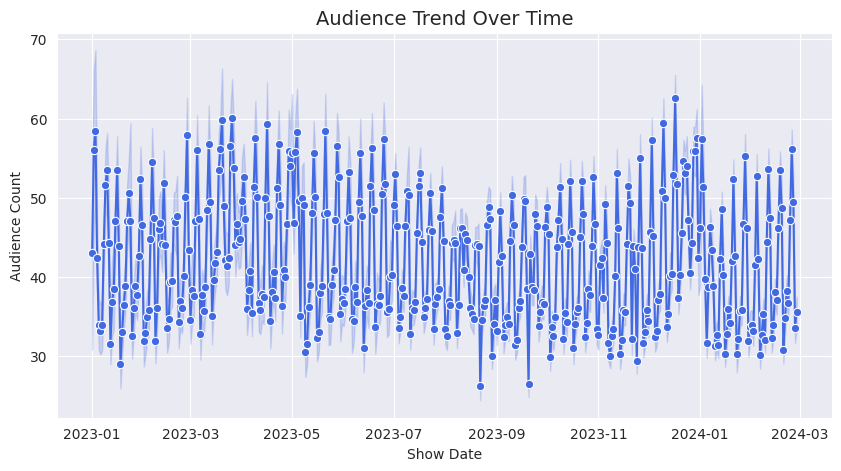

In [120]:
#️ Audience Trend Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=dt, x='show_date', y='audience_count', marker='o', color='royalblue')
plt.title("Audience Trend Over Time", fontsize=14)
plt.xlabel("Show Date")
plt.ylabel("Audience Count")
plt.grid(True)
plt.show()

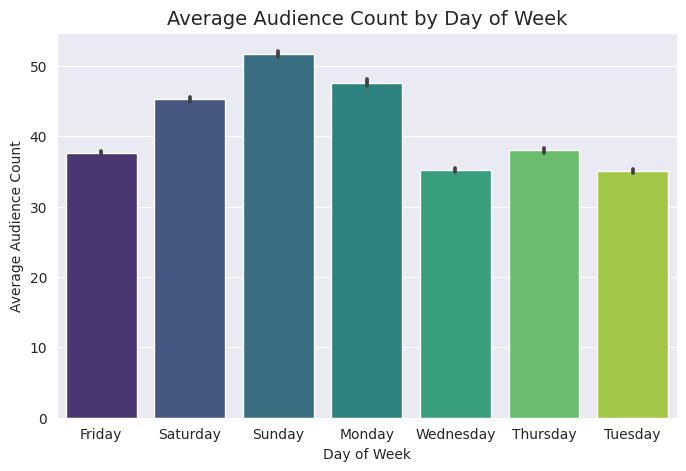

In [121]:
# Average Audience Count by Day of Wee
plt.figure(figsize=(8, 5))
sns.barplot(data=dt, x='weekday', y='audience_count', estimator='mean', palette='viridis')
plt.title("Average Audience Count by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Average Audience Count")
plt.show()


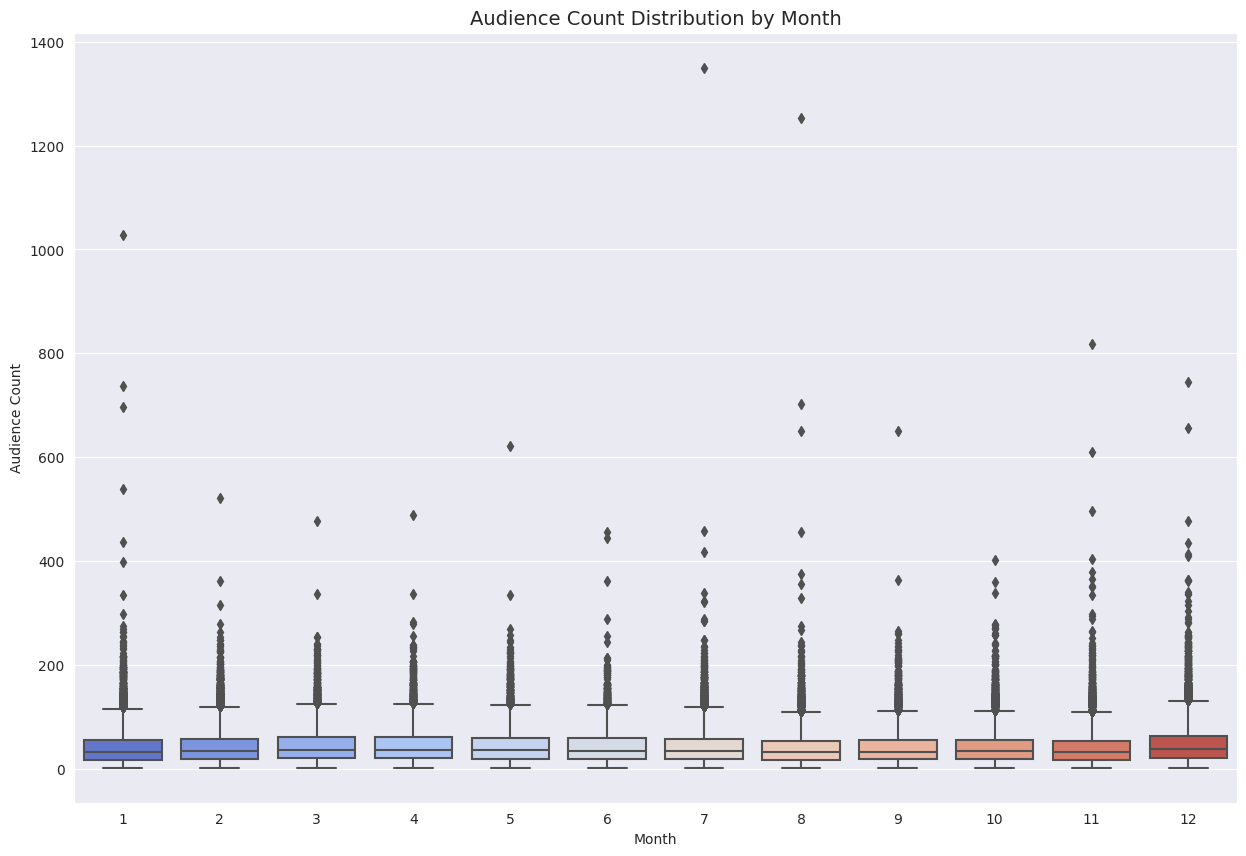

In [122]:
# Audience Count Distribution by Month"
plt.figure(figsize=(15,10))
sns.boxplot(data=dt, x='month', y='audience_count', palette='coolwarm')
plt.title("Audience Count Distribution by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Audience Count")
plt.show()

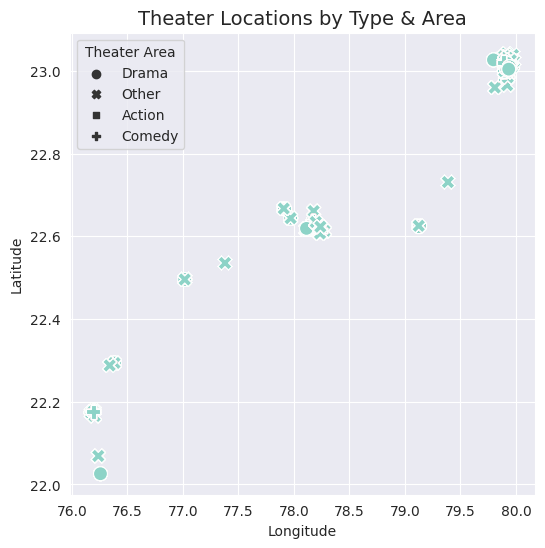

In [123]:
# Theater Locations by Type & Area
plt.figure(figsize=(6,6))
sns.scatterplot(data=dt, x='longitude', y='latitude', style='theater_type', s=100)
plt.title("Theater Locations by Type & Area", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Theater Area")
plt.show()


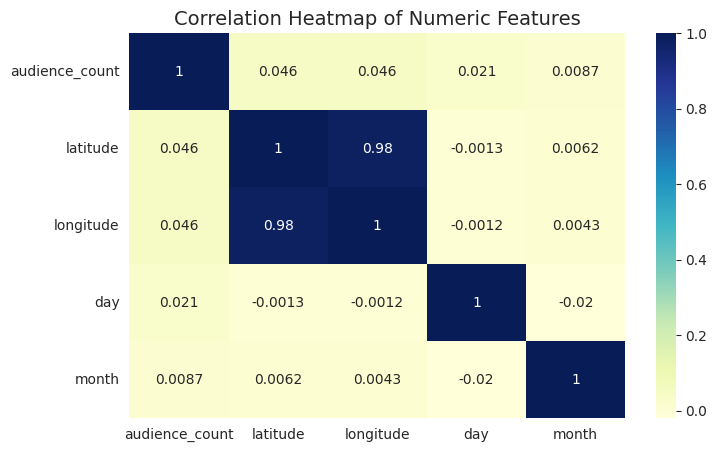

In [124]:
#Correlation Heatmap of Numeric Features
plt.figure(figsize=(8,5))
sns.heatmap(dt[['audience_count', 'latitude', 'longitude', 'day', 'month']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


In [125]:
df = final_df.copy()  # assuming final_df is my dataframe
# Drop redundant or ID-like columns
df = df.drop(columns=['book_theater_id', 'day_of_week', 'month'], errors='ignore')
# Convert date column to datetime (if not already)
df['show_date'] = pd.to_datetime(df['show_date'])

# =========================================================================================================================================================
# ***6. Initial Feature Engineerings with the data***
# =========================================================================================================================================================

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
final_df['show_date'] = pd.to_datetime(final_df['show_date'])
final_df['year'] = final_df['show_date'].dt.year
final_df['month'] = final_df['show_date'].dt.month
final_df['day'] = final_df['show_date'].dt.day
final_df['day_of_week_num'] = final_df['show_date'].dt.dayofweek   # Monday=0, Sunday=6
final_df['weekofyear'] = final_df['show_date'].dt.isocalendar().week.astype(int)

In [127]:
# Weekend flag
final_df['is_weekend'] = final_df['day_of_week_num'].isin([5,6]).astype(int)

# Cyclical encoding for month and day_of_week
final_df['month_sin'] = np.sin(2 * np.pi * final_df['month']/12)
final_df['month_cos'] = np.cos(2 * np.pi * final_df['month']/12)
final_df['dow_sin'] = np.sin(2 * np.pi * final_df['day_of_week_num']/7)
final_df['dow_cos'] = np.cos(2 * np.pi * final_df['day_of_week_num']/7)
final_df = final_df.sort_values(['book_theater_id', 'show_date'])

# Lag features
final_df['lag_1'] = final_df.groupby('book_theater_id')['audience_count'].shift(1)
final_df['lag_7'] = final_df.groupby('book_theater_id')['audience_count'].shift(7)

# Rolling means
final_df['rolling_mean_7'] = final_df.groupby('book_theater_id')['audience_count'].shift(1).rolling(7).mean()
final_df['rolling_mean_30'] = final_df.groupby('book_theater_id')['audience_count'].shift(1).rolling(30).mean()

final_df['week_of_month'] = final_df['day'].apply(lambda d: (d - 1) // 7 + 1)
final_df['is_mid_month'] = final_df['day'].between(10, 20).astype(int)
final_df['is_month_start'] = final_df['show_date'].dt.is_month_start.astype(int)
final_df['is_month_end'] = final_df['show_date'].dt.is_month_end.astype(int)

In [128]:
final_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,book_theater_id,show_date,audience_count,year,month,day,weekday,tickets_booked,tickets_sold,cine_theater_id,...,dow_sin,dow_cos,lag_1,lag_7,rolling_mean_7,rolling_mean_30,week_of_month,is_mid_month,is_month_start,is_month_end
0,book_00001,2023-01-13,50,2023,1,13,Friday,NaN,NaN,NaN,...,-0.433884,-0.900969,NaN,NaN,NaN,NaN,2,1,0,0
1,book_00001,2023-01-14,64,2023,1,14,Saturday,NaN,NaN,NaN,...,-0.974928,-0.222521,50.0,NaN,NaN,NaN,2,1,0,0
2,book_00001,2023-01-15,58,2023,1,15,Sunday,NaN,NaN,NaN,...,-0.781831,0.623490,64.0,NaN,NaN,NaN,3,1,0,0
3,book_00001,2023-01-16,44,2023,1,16,Monday,NaN,NaN,NaN,...,0.000000,1.000000,58.0,NaN,NaN,NaN,3,1,0,0
4,book_00001,2023-01-18,12,2023,1,18,Wednesday,NaN,NaN,NaN,...,0.974928,-0.222521,44.0,NaN,NaN,NaN,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214031,book_00829,2024-02-23,16,2024,2,23,Friday,NaN,NaN,NaN,...,-0.433884,-0.900969,14.0,14.0,10.571429,11.800000,4,0,0,0
214032,book_00829,2024-02-24,8,2024,2,24,Saturday,NaN,NaN,NaN,...,-0.974928,-0.222521,16.0,4.0,10.857143,12.200000,4,0,0,0
214033,book_00829,2024-02-25,16,2024,2,25,Sunday,NaN,NaN,NaN,...,-0.781831,0.623490,8.0,6.0,11.428571,12.066667,4,0,0,0
214034,book_00829,2024-02-27,16,2024,2,27,Tuesday,NaN,NaN,NaN,...,0.781831,0.623490,16.0,12.0,12.857143,12.066667,4,0,0,0


# =====================================================================================================================================================================================
# ***7. Data Preprocessing included scaling, ecoding ,etc***
# =====================================================================================================================================================================================

In [129]:
df = final_df.copy()  # assuming final_df is my dataframe
# Drop redundant or ID-like columns
df = df.drop(columns=['book_theater_id', 'day_of_week', 'month_y'], errors='ignore')
# Convert date column to datetime (if not already)
df['show_date'] = pd.to_datetime(df['show_date'])

In [130]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# =====================================================================================================================================================================================
# Handling Missing Values
# =====================================================================================================================================================================================

In [131]:
# Define column groups
numerical_cols = ['tickets_booked', 'tickets_sold', 'latitude', 'longitude']
categorical_cols = ['theater_type', 'theater_area']

# --- Impute numerical columns with median ---
num_imputer = SimpleImputer(strategy='median')
num_imputer

SimpleImputer(strategy='median')

In [132]:
final_df[numerical_cols] = num_imputer.fit_transform(final_df[numerical_cols])

In [133]:
# --- Impute categorical columns with 'Unknown' ---
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
cat_imputer

SimpleImputer(fill_value='Unknown', strategy='constant')

In [134]:
final_df[categorical_cols] = cat_imputer.fit_transform(final_df[categorical_cols])

# ====================================================================================================================================================================================
# ***Label Encoding (Convert Categorical to Numerical)***
# ====================================================================================================================================================================================

In [135]:
# encoding the theater tye for label Encoder
le_type = LabelEncoder()
le_type

LabelEncoder()

In [136]:
# encoding the theater area for label Encoder
le_area = LabelEncoder()
le_area

LabelEncoder()

In [137]:
final_df['theater_type_enc'] = le_type.fit_transform(final_df['theater_type'])
final_df['theater_area_enc'] = le_area.fit_transform(final_df['theater_area'])

# ======================================================================================================================================================================================
# ***Mapping Month and Weekday Names to Numbers***
# ======================================================================================================================================================================================

In [138]:
# HERE I am trying to map the month and weekday with the number, which i good approachesm to convert the value into numerical.......
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

weekday_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

final_df['month_y_num'] = final_df['month'].map(month_map)
final_df['weekday_num'] = final_df['weekday'].map(weekday_map)

# ===========================================================================================================================================================================================
# ***Cyclical Encoding for Month & Weekday***
# ==========================================================================================================================================================================================

In [139]:
final_df['month_y_sin'] = np.sin(2 * np.pi * final_df['month_y_num'] / 12)
final_df['month_y_cos'] = np.cos(2 * np.pi * final_df['month_y_num'] / 12)
final_df['weekday_sin'] = np.sin(2 * np.pi * final_df['weekday_num'] / 7)
final_df['weekday_cos'] = np.cos(2 * np.pi * final_df['weekday_num'] / 7)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)


# ===========================================================================================================================================================================================
# ***Additional Label Encoding (Weekday Text)***
# ===========================================================================================================================================================================================

In [140]:
# I am again using the strategy  of label encoder for the columns weekday_enc
le_wd = LabelEncoder()
le_wd

LabelEncoder()

In [141]:
final_df['weekday_enc'] = le_wd.fit_transform(final_df['weekday'])

# ===========================================================================================================================================================================================
# ***K-Means Clustering Based on Coordinates***
# ===========================================================================================================================================================================================

In [142]:
# Drop missing coordinates for clustering
coords = final_df[['latitude', 'longitude']].dropna()

In [143]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans

KMeans(n_clusters=10, random_state=42)

In [144]:
clusters = kmeans.fit_predict(coords)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [145]:
# Assign cluster labels back to dataframe
final_df.loc[coords.index, 'geo_cluster'] = clusters
final_df['geo_cluster'] = final_df['geo_cluster'].fillna(-1).astype(int)

# ===========================================================================================================================================================================================
# ***Final Cleanup (Fill Any Remaining Missing Values)***
# =============================================================================================================================================================================================

In [146]:
final_df = final_df.fillna(-1)
final_df.head(10)

,book_theater_id,show_date,audience_count,year,month,day,weekday,tickets_booked,tickets_sold,cine_theater_id,...,theater_type_enc,theater_area_enc,month_y_num,weekday_num,month_y_sin,month_y_cos,weekday_sin,weekday_cos,weekday_enc,geo_cluster
0,book_00001,2023-01-13,50,2023,1,13,Friday,8.0,4.0,-1,...,2,1,-1.0,4,-1.0,-1.0,-0.433884,-0.900969,0,2
1,book_00001,2023-01-14,64,2023,1,14,Saturday,8.0,4.0,-1,...,2,1,-1.0,5,-1.0,-1.0,-0.974928,-0.222521,2,2
2,book_00001,2023-01-15,58,2023,1,15,Sunday,8.0,4.0,-1,...,2,1,-1.0,6,-1.0,-1.0,-0.781831,0.623490,3,2
3,book_00001,2023-01-16,44,2023,1,16,Monday,8.0,4.0,-1,...,2,1,-1.0,0,-1.0,-1.0,0.000000,1.000000,1,2
4,book_00001,2023-01-18,12,2023,1,18,Wednesday,8.0,4.0,-1,...,2,1,-1.0,2,-1.0,-1.0,0.974928,-0.222521,6,2
5,book_00001,2023-01-19,18,2023,1,19,Thursday,8.0,4.0,-1,...,2,1,-1.0,3,-1.0,-1.0,0.433884,-0.900969,4,2
6,book_00001,2023-01-20,62,2023,1,20,Friday,8.0,4.0,-1,...,2,1,-1.0,4,-1.0,-1.0,-0.433884,-0.900969,0,2
7,book_00001,2023-01-21,42,2023,1,21,Saturday,8.0,4.0,-1,...,2,1,-1.0,5,-1.0,-1.0,-0.974928,-0.222521,2,2
8,book_00001,2023-01-22,36,2023,1,22,Sunday,8.0,4.0,-1,...,2,1,-1.0,6,-1.0,-1.0,-0.781831,0.623490,3,2
9,book_00001,2023-01-23,52,2023,1,23,Monday,8.0,4.0,-1,...,2,1,-1.0,0,-1.0,-1.0,0.000000,1.000000,1,2


---
# *Importing Required Libraries*
---

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
df = final_df.copy()

# ===========================================================================================================================================================================================
# ***8. Additional Feature Engineering with Final_df for enhancing my performance***
# ===========================================================================================================================================================================================

# =======================================================================================================================================================================================
# *Extracting Date Features...*
# ========================================================================================================================================================================================

In [149]:
# Basic date parts
df['show_date'] = pd.to_datetime(df['show_date'])
df['month'] = df['show_date'].dt.month
df['day'] = df['show_date'].dt.day
df['week'] = df['show_date'].dt.isocalendar().week.astype(int)
df['day_of_week'] = df['show_date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['is_month_start'] = df['show_date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['show_date'].dt.is_month_end.astype(int)
# Flags for calendar positions
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['is_month_start'] = df['show_date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['show_date'].dt.is_month_end.astype(int)

# ===========================================================================================================================================================================================
# *Additional Date-Based Feature Engineering*
# ===========================================================================================================================================================================================

In [150]:
df['week_of_month'] = df['show_date'].apply(lambda d: (d.day - 1) // 7 + 1)
df['is_mid_month'] = df['day'].between(10, 20).astype(int)

# ===========================================================================================================================================================================================
# ***Cyclical Encoding for Month and Day of Week***
# ===========================================================================================================================================================================================

In [151]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

dow_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['dow_num'] = df['day_of_week'].map(dow_mapping)
df['dow_sin'] = np.sin(2 * np.pi * df['dow_num'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['dow_num'] / 7)

# ===========================================================================================================================================================================================
# ***Selecting Feature Columns***
# ===========================================================================================================================================================================================

In [152]:
features = [
    'book_theater_id', 'day', 'week_of_month', 'is_weekend',
    'is_month_start', 'is_month_end', 'is_mid_month',
    'month_sin', 'month_cos', 'dow_sin', 'dow_cos'
]
X = df[features]
y = df['audience_count']

# ========================================================================================================================================================================================
# ***Encoding Categorical Features***
# ========================================================================================================================================================================================

In [153]:

X_encoded = pd.get_dummies(X, columns=['book_theater_id'], drop_first=True)


# =========================================================================================================================================================================================
# ***Creating Polynomial Interaction Features (Degree = 2)***
# ========================================================================================================================================================================================

In [154]:
numeric_cols = [
    'day', 'week_of_month', 'is_weekend', 'is_month_start',
    'is_month_end', 'is_mid_month', 'month_sin', 'month_cos',
    'dow_sin', 'dow_cos'
]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly

PolynomialFeatures(include_bias=False, interaction_only=True)

In [155]:
X_numeric_interactions = poly.fit_transform(X_encoded[numeric_cols])
# Combine interaction terms with encoded categorical variables
X_final = np.hstack([X_numeric_interactions, X_encoded.drop(columns=numeric_cols).values])

# ===========================================================================================================================================================================================
# ***9.Train–Test Split***
# ===========================================================================================================================================================================================

In [156]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

# ===========================================================================================================================================================================================
# ***Feature Scaling***
# ===========================================================================================================================================================================================

In [157]:

scaler = StandardScaler()
scaler

StandardScaler()

In [158]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.59194355,  0.22850513, -0.67484367, ..., -0.04010772,
        -0.03785355, -0.02911257],
       [-1.01653608, -1.36611827, -0.67484367, ..., -0.04010772,
        -0.03785355, -0.02911257],
       [ 1.51107476,  1.82312853, -0.67484367, ..., -0.04010772,
        -0.03785355, -0.02911257],
       ...,
       [ 1.16640056,  1.02581683,  1.48182466, ..., -0.04010772,
        -0.03785355, -0.02911257],
       [-0.67186188, -0.56880657,  1.48182466, ..., -0.04010772,
        -0.03785355, -0.02911257],
       [ 0.59194355,  0.22850513, -0.67484367, ..., -0.04010772,
        -0.03785355, -0.02911257]])

In [159]:
X_val = scaler.transform(X_val)

# ===========================================================================================================================================================================================
# ***Feature Selection (SelectKBest)***
# ===========================================================================================================================================================================================

In [160]:
k = 880  # Number of top features to select (tune as needed)
selector = SelectKBest(score_func=f_regression, k=k)
selector

SelectKBest(k=880, score_func=<function f_regression at 0x7b7033627ce0>)

In [161]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

print("Number of features before selection:", X_train.shape[1])
print("Number of features after selection:", X_train_selected.shape[1])


Number of features before selection: 880
Number of features after selection: 880


# ===========================================================================================================================================================================================
# ***10. Ridge Regression Model Training for submission***
# ==========================================================================================================================================================================================

In [162]:

model_lr = Ridge(alpha=1.0, random_state=42)
model_lr

Ridge(random_state=42)

In [163]:
model_lr.fit(X_train_selected, y_train)

Ridge(random_state=42)

In [164]:
# ---- Make Predictions ----
y_train_pred = model_lr.predict(X_train_selected)
y_val_pred   = model_lr.predict(X_val_selected)
# ---- Calculate Metrics ----
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2   = r2_score(y_train, y_train_pred)

val_rmse   = mean_squared_error(y_val, y_val_pred, squared=False)
val_r2     = r2_score(y_val, y_val_pred)

# ---- Create Summary DataFrame ----
ridge_summary = pd.DataFrame({
    "Dataset": ["Train", "Validation"],
    "R² Score": [train_r2, val_r2],
    "RMSE": [train_rmse, val_rmse]
})
ridge_summary

,Dataset,R² Score,RMSE
0,Train,0.450726,24.343726
1,Validation,0.446069,24.403275


In [165]:
# ---- Style Table for Display ----
ridge_summary_styled = (
    ridge_summary.style
    .set_caption("Ridge Regression Model Evaluation Summary")
    .set_table_styles([
        {"selector": "caption",
         "props": [("font-size", "18px"), ("text-align", "center"), ("font-weight", "bold"), ("color", "#2F4F4F")]},
        {"selector": "th",
         "props": [("background-color", "#2F4F4F"), ("color", "white"), ("text-align", "center"), ("font-size", "16px")]},
        {"selector": "td",
         "props": [("text-align", "center"), ("font-size", "20px")]}
    ])
    .format({"R² Score": "{:.4f}", "RMSE": "{:,.4f}"})
)
display(ridge_summary_styled)

,Dataset,R² Score,RMSE
0,Train,0.4507,24.3437
1,Validation,0.4461,24.4033


# =========================================================================================================================================================================================
# ***Sample Submission File Preparation......***
# =========================================================================================================================================================================================

In [166]:
'''from sklearn.preprocessing import PolynomialFeatures
# ---- Extract theater and show_date from ID ----
Sample_submission['book_theater_id'] = Sample_submission['ID'].apply(lambda x: "_".join(x.split("_")[:2]))
Sample_submission['show_date'] = pd.to_datetime(Sample_submission['ID'].apply(lambda x: x.split("_")[2]))'''

'from sklearn.preprocessing import PolynomialFeatures\n# ---- Extract theater and show_date from ID ----\nSample_submission[\'book_theater_id\'] = Sample_submission[\'ID\'].apply(lambda x: "_".join(x.split("_")[:2]))\nSample_submission[\'show_date\'] = pd.to_datetime(Sample_submission[\'ID\'].apply(lambda x: x.split("_")[2]))'

In [167]:
# ---- Date features ----
'''Sample_submission['month'] = Sample_submission['show_date'].dt.month
Sample_submission['day'] = Sample_submission['show_date'].dt.day
Sample_submission['week'] = Sample_submission['show_date'].dt.isocalendar().week.astype(int)
Sample_submission['day_of_week'] = Sample_submission['show_date'].dt.day_name()
Sample_submission['is_weekend'] = Sample_submission['day_of_week'].isin(['Saturday','Sunday']).astype(int)
Sample_submission['is_month_start'] = Sample_submission['show_date'].dt.is_month_start.astype(int)
Sample_submission['is_month_end'] = Sample_submission['show_date'].dt.is_month_end.astype(int)'''

"Sample_submission['month'] = Sample_submission['show_date'].dt.month\nSample_submission['day'] = Sample_submission['show_date'].dt.day\nSample_submission['week'] = Sample_submission['show_date'].dt.isocalendar().week.astype(int)\nSample_submission['day_of_week'] = Sample_submission['show_date'].dt.day_name()\nSample_submission['is_weekend'] = Sample_submission['day_of_week'].isin(['Saturday','Sunday']).astype(int)\nSample_submission['is_month_start'] = Sample_submission['show_date'].dt.is_month_start.astype(int)\nSample_submission['is_month_end'] = Sample_submission['show_date'].dt.is_month_end.astype(int)"

In [168]:
# ---- Additional features ----
#Sample_submission['week_of_month'] = Sample_submission['show_date'].apply(lambda d: (d.day - 1)//7 + 1)
#Sample_submission['is_mid_month'] = Sample_submission['day'].between(10,20).astype(int)

In [169]:
# Cyclical encoding
'''Sample_submission['month_sin'] = np.sin(2 * np.pi * Sample_submission['month']/12)
Sample_submission['month_cos'] = np.cos(2 * np.pi * Sample_submission['month']/12)
dow_mapping = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
Sample_submission['dow_num'] = Sample_submission['day_of_week'].map(dow_mapping)
Sample_submission['dow_sin'] = np.sin(2 * np.pi * Sample_submission['dow_num']/7)
Sample_submission['dow_cos'] = np.cos(2 * np.pi * Sample_submission['dow_num']/7)'''

"Sample_submission['month_sin'] = np.sin(2 * np.pi * Sample_submission['month']/12)\nSample_submission['month_cos'] = np.cos(2 * np.pi * Sample_submission['month']/12)\ndow_mapping = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}\nSample_submission['dow_num'] = Sample_submission['day_of_week'].map(dow_mapping)\nSample_submission['dow_sin'] = np.sin(2 * np.pi * Sample_submission['dow_num']/7)\nSample_submission['dow_cos'] = np.cos(2 * np.pi * Sample_submission['dow_num']/7)"

In [170]:
# ---- Select features (same as training) ----
'''features = [
    'book_theater_id', 'day', 'week_of_month', 'is_weekend', 'is_month_start', 
    'is_month_end', 'is_mid_month', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos'
]
X_test = Sample_submission[features]'''

"features = [\n    'book_theater_id', 'day', 'week_of_month', 'is_weekend', 'is_month_start', \n    'is_month_end', 'is_mid_month', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos'\n]\nX_test = Sample_submission[features]"

In [171]:
# ---- One-hot encode 'book_theater_id' ----
#X_test_encoded = pd.get_dummies(X_test, columns=['book_theater_id'], drop_first=True)

# ---- Align with training columns ----
#X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [172]:
'''# ---- Interaction terms (numeric only) ----
numeric_cols = ['day', 'week_of_month', 'is_weekend', 'is_month_start',
                'is_month_end', 'is_mid_month', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos']

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_test_numeric_interactions = poly.fit_transform(X_test_encoded[numeric_cols])

# ---- Combine with categorical dummies ----
X_test_final = np.hstack([X_test_numeric_interactions, X_test_encoded.drop(columns=numeric_cols).values])
X_test_final = scaler.transform(X_test_final)'''

"# ---- Interaction terms (numeric only) ----\nnumeric_cols = ['day', 'week_of_month', 'is_weekend', 'is_month_start',\n                'is_month_end', 'is_mid_month', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos']\n\npoly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)\nX_test_numeric_interactions = poly.fit_transform(X_test_encoded[numeric_cols])\n\n# ---- Combine with categorical dummies ----\nX_test_final = np.hstack([X_test_numeric_interactions, X_test_encoded.drop(columns=numeric_cols).values])\nX_test_final = scaler.transform(X_test_final)"

# =========================================================================================================================================================================================
# ***Final Submision file saving the file into (submission.csv)***
# =========================================================================================================================================================================================

In [173]:
'''Sample_submission['predicted_audience_count'] = model_lr.predict(X_test_final)
submission = Sample_submission[['ID', 'predicted_audience_count']].copy()
submission['predicted_audience_count'] = submission['predicted_audience_count'].astype(float)
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")'''

'Sample_submission[\'predicted_audience_count\'] = model_lr.predict(X_test_final)\nsubmission = Sample_submission[[\'ID\', \'predicted_audience_count\']].copy()\nsubmission[\'predicted_audience_count\'] = submission[\'predicted_audience_count\'].astype(float)\nsubmission.to_csv("submission.csv", index=False)\n\nprint("Submission file saved as submission.csv")'

In [174]:
#Display first 5 predictions
#print(Sample_submission[['ID', 'predicted_audience_count']].head(5))

# ===========================================================================================================================================================================================
# ***11.Hyperparameter Tuning on the ridge model.***
# ===========================================================================================================================================================================================

In [175]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
# prediction and performance before Tunining@
ridge_summary = pd.DataFrame({
    "Dataset": ["Train", "Validation"],
    "R² Score": [train_r2, val_r2],
    "RMSE": [train_rmse, val_rmse]
})
ridge_summary = ridge_summary.round(4)
print("Ridge Regression Performance (Before Tuning):")
print(ridge_summary)

Ridge Regression Performance (Before Tuning):
      Dataset  R² Score     RMSE
0       Train    0.4507  24.3437
1  Validation    0.4461  24.4033


In [177]:
model_lr.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.0001}

In [178]:
# Define parameter grid for Ridge ----
param_distributions =  {
    'alpha': [0.1,0.01,1,10,100],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [None,100,300,500,1000]

}
param_distributions

{'alpha': [0.1, 0.01, 1, 10, 100],
 'fit_intercept': [True, False],
 'positive': [True, False],
 'tol': [0.001, 0.0001, 1e-05],
 'max_iter': [None, 100, 300, 500, 1000]}

In [179]:
ridge_tuned = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=param_distributions,  
    n_iter=10,               
    scoring='r2',
    cv=5,                    
    n_jobs=-1,              
    random_state=42,
    verbose=2
)
ridge_tuned

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.01, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'max_iter': [None, 100, 300, 500, 1000],
                                        'positive': [True, False],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   random_state=42, scoring='r2', verbose=2)

In [180]:
ridge_tuned.fit(X_train_selected, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.01, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'max_iter': [None, 100, 300, 500, 1000],
                                        'positive': [True, False],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   random_state=42, scoring='r2', verbose=2)

In [181]:
# Best params and estimator after tuning
best_ridge = ridge_tuned.best_estimator_
best_params = ridge_tuned.best_params_

# Predictions (after tuning)
y_pred_train_tuned = best_ridge.predict(X_train_selected)
y_pred_val_tuned   = best_ridge.predict(X_val_selected)

# Performance (after tuning)
r2_train_after = r2_score(y_train, y_pred_train_tuned)
r2_val_after   = r2_score(y_val, y_pred_val_tuned)
rmse_train_after = np.sqrt(mean_squared_error(y_train, y_pred_train_tuned))
rmse_val_after   = np.sqrt(mean_squared_error(y_val, y_pred_val_tuned))

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['R2 (Train)', 'R2 (Validation)', 'RMSE (Train)', 'RMSE (Validation)'],
    'After Tuning': [r2_train_after, r2_val_after, rmse_train_after, rmse_val_after]
})

print("Ridge Regression Performance Comparison:")
print(comparison_df)

print("\nBest Parameters Found:")
print(best_params)


Ridge Regression Performance Comparison:
              Metric  After Tuning
0         R2 (Train)      0.450725
1    R2 (Validation)      0.446077
2       RMSE (Train)     24.343743
3  RMSE (Validation)     24.403102

Best Parameters Found:
{'tol': 1e-05, 'positive': False, 'max_iter': 500, 'fit_intercept': True, 'alpha': 10}


# ===========================================================================================================================================================================================
# ***12. Other 2/3 Model Training***
# ===========================================================================================================================================================================================


# =========================================================================================================================================================================================
# ***2. LGB Regressor Model***
# =========================================================================================================================================================================================

In [182]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from lightgbm import early_stopping, log_evaluation
model_lgb = LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_lgb.fit(X_train_selected, y_train)
model_lgb

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.341222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4007
[LightGBM] [Info] Number of data points in the train set: 171228, number of used features: 872
[LightGBM] [Info] Start training from score 41.603278


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=1000,
              objective='regression', random_state=42, subsample=0.8)

# =========================================================================================================================================================================================
## ***LGB Regressor Model (Prediction and Evaluation)***
# =========================================================================================================================================================================================

In [183]:
# Predictions
y_train_pred_lgb = model_lgb.predict(X_train_selected)
y_val_pred_lgb   = model_lgb.predict(X_val)
train_rmse_lgb = mean_squared_error(y_train, y_train_pred_lgb, squared=False)
train_r2_lgb   = r2_score(y_train, y_train_pred_lgb)
val_rmse_lgb = mean_squared_error(y_val, y_val_pred_lgb, squared=False)
val_r2_lgb   = r2_score(y_val, y_val_pred_lgb)

# Display Results
print("LightGBM Regression Performance:")
print(f"Train RMSE: {train_rmse_lgb:.4f}")
print(f"Train R²: {train_r2_lgb:.4f}")
print(f"Validation RMSE: {val_rmse_lgb:.4f}")
print(f"Validation R²: {val_r2_lgb:.4f}")

LightGBM Regression Performance:
Train RMSE: 22.0712
Train R²: 0.5485
Validation RMSE: 22.9046
Validation R²: 0.5120


# =========================================================================================================================================================================================
## ***LGB Regressor Model (Submission)***
# =========================================================================================================================================================================================

In [184]:
'''Sample_submission['book_theater_id'] = Sample_submission['ID'].apply(lambda x: "_".join(x.split("_")[:2]))
Sample_submission['show_date'] = pd.to_datetime(Sample_submission['ID'].apply(lambda x: x.split("_")[2]))
Sample_submission['month'] = Sample_submission['show_date'].dt.month
Sample_submission['day'] = Sample_submission['show_date'].dt.day
Sample_submission['week'] = Sample_submission['show_date'].dt.isocalendar().week.astype(int)
Sample_submission['quarter'] = Sample_submission['show_date'].dt.quarter
Sample_submission['day_of_week'] = Sample_submission['show_date'].dt.day_name()
Sample_submission['is_weekend'] = Sample_submission['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
Sample_submission['is_month_start'] = Sample_submission['show_date'].dt.is_month_start.astype(int)
Sample_submission['is_month_end'] = Sample_submission['show_date'].dt.is_month_end.astype(int)
X_test = Sample_submission[['book_theater_id', 'day_of_week', 'month', 'day',
                            'week', 'quarter', 'is_weekend', 'is_month_start', 'is_month_end']]
X_test_encoded = pd.get_dummies(X_test, columns=['book_theater_id', 'day_of_week'])
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)
Sample_submission['predicted_audience_count'] = model.predict(X_test_encoded)
submission = Sample_submission[['ID', 'predicted_audience_count']]
print(submission)
'''

'Sample_submission[\'book_theater_id\'] = Sample_submission[\'ID\'].apply(lambda x: "_".join(x.split("_")[:2]))\nSample_submission[\'show_date\'] = pd.to_datetime(Sample_submission[\'ID\'].apply(lambda x: x.split("_")[2]))\nSample_submission[\'month\'] = Sample_submission[\'show_date\'].dt.month\nSample_submission[\'day\'] = Sample_submission[\'show_date\'].dt.day\nSample_submission[\'week\'] = Sample_submission[\'show_date\'].dt.isocalendar().week.astype(int)\nSample_submission[\'quarter\'] = Sample_submission[\'show_date\'].dt.quarter\nSample_submission[\'day_of_week\'] = Sample_submission[\'show_date\'].dt.day_name()\nSample_submission[\'is_weekend\'] = Sample_submission[\'day_of_week\'].isin([\'Saturday\', \'Sunday\']).astype(int)\nSample_submission[\'is_month_start\'] = Sample_submission[\'show_date\'].dt.is_month_start.astype(int)\nSample_submission[\'is_month_end\'] = Sample_submission[\'show_date\'].dt.is_month_end.astype(int)\nX_test = Sample_submission[[\'book_theater_id\', \

In [185]:
'''submission = Sample_submission[['ID', 'predicted_audience_count']]
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")'''

'submission = Sample_submission[[\'ID\', \'predicted_audience_count\']]\nsubmission.to_csv("submission.csv", index=False)\n\nprint("Submission file saved as submission.csv")'

# =========================================================================================================================================================================================
## ***Hyperparameter tuning on LGB Regressor***
# =========================================================================================================================================================================================

In [186]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
model_lgb = LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1,
    verbose=-1,              
    force_col_wise=True   
)
param_dist = {
    'num_leaves': [15, 31, 50, 70],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [300, 500, 700],
    'max_depth': [-1, 5, 10, 15],
}
param_dist

{'num_leaves': [15, 31, 50, 70],
 'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
 'n_estimators': [300, 500, 700],
 'max_depth': [-1, 5, 10, 15]}

In [188]:
random_search = RandomizedSearchCV(
    estimator=model_lgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(force_col_wise=True, n_jobs=-1,
                                           objective='regression',
                                           random_state=42, verbose=-1),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05,
                                                          0.07, 0.1],
                                        'max_depth': [-1, 5, 10, 15],
                                        'n_estimators': [300, 500, 700],
                                        'num_leaves': [15, 31, 50, 70]},
                   random_state=42, scoring='r2', verbose=1)

In [189]:
#random_search.fit(X_train_selected, y_train)

In [190]:
#print("Best Parameters Found:")
#print(random_search.best_params_)
#print("Best Cross-Validation R² Score:")
#print(random_search.best_score_)

# =========================================================================================================================================================================================
# ***3.XGB Regressor Model***
# =========================================================================================================================================================================================

In [191]:
from xgboost import XGBRegressor
# ---- Define Model ----
model_xgb = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    max_depth=6,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=1
)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [192]:
# ---- Train Model ----
model_xgb.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# =========================================================================================================================================================================================
## ***XGB Regressor Model Predcition and Evaluations...........***
# =========================================================================================================================================================================================

In [193]:

# Prediciton and Evaluation of the Model XGB Regressor.....................
y_train_pred_xgb = model_xgb.predict(X_train_selected)
y_val_pred_xgb   = model_xgb.predict(X_val_selected)



# Evaluation of the Model 
train_r2_xgb   = r2_score(y_train, y_train_pred_xgb)
val_r2_xgb     = r2_score(y_val, y_val_pred_xgb)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
val_rmse_xgb   = mean_squared_error(y_val, y_val_pred_xgb, squared=False)


# ---- Display ----
print("XGBoost Regressor Evaluation")
print("-------------------------------")
print(f"Train R² Score : {train_r2_xgb:.4f}")
print(f"Val   R² Score : {val_r2_xgb:.4f}")
print(f"Train RMSE     : {train_rmse_xgb:.4f}")
print(f"Val   RMSE     : {val_rmse_xgb:.4f}")

XGBoost Regressor Evaluation
-------------------------------
Train R² Score : 0.4839
Val   R² Score : 0.4054
Train RMSE     : 23.5968
Val   RMSE     : 25.2828


# =========================================================================================================================================================================================
# ***13.MODEL COMPARISON DASHBOARD (Evaluations)***
# =========================================================================================================================================================================================


In [194]:
from IPython.display import display, Markdown
results = {
    "Model": [
        "Ridge Regression",
        "LightGBM Regressor",
        "XGBoost Regressor"
    ],
    "Train R²": [
        train_r2,         # Linear Regression
        train_r2_lgb,     # LightGBM
        train_r2_xgb          # XGB
    ],
    "Validation R²": [
        val_r2,           # Linear Regression
        val_r2_lgb,       # LightGBM
        val_r2_xgb            # XGB
    ],
    "Train RMSE": [
        train_rmse,
        train_rmse_lgb,
        train_rmse_xgb
    ],
    "Validation RMSE": [
        val_rmse,
        val_rmse_lgb,
        val_rmse_xgb
    ]
}
results

{'Model': ['Ridge Regression', 'LightGBM Regressor', 'XGBoost Regressor'],
 'Train R²': [0.4507258012789118, 0.5484888065966844, 0.48391521902725654],
 'Validation R²': [0.44606872337190073,
  0.5120166582217844,
  0.40542053512272314],
 'Train RMSE': [24.343726214958586, 22.071239128432975, 23.596792932235694],
 'Validation RMSE': [24.40327481088058, 22.90459755072886, 25.28279712691546]}

In [195]:
comparison_df = pd.DataFrame(results)
# Add Generalization Gap (Train R² - Validation R²)
comparison_df["Generalization Gap"] = (comparison_df["Train R²"] - comparison_df["Validation R²"]).abs()
# Sort by best generalization (smaller gap = better) 
comparison_df = comparison_df.sort_values(by="Generalization Gap", ascending=True).reset_index(drop=True)
def highlight_ridge(row):
    if "Ridge" in row["Model"]:
        return ['background-color: #A7C7E7; color: black; font-weight: bold;'] * len(row)
    else:
        return [''] * len(row)

# ===========================================================================================================================================================================================
# ***14. Overall Comparision table***
# ===========================================================================================================================================================================================

In [196]:
# Style the table ----
styled_df = (
    comparison_df.style
    .apply(highlight_ridge, axis=1)
    .background_gradient(subset=["Train R²", "Validation R²"], cmap="Greens")
    .background_gradient(subset=["Train RMSE", "Validation RMSE"], cmap="Reds_r")
    .background_gradient(subset=["Generalization Gap"], cmap="Purples_r")
    .set_caption("**Model Performance Comparison — Preference to Ridge Regression (Best Generalization)**")
    .format({
        "Train R²": "{:.4f}",
        "Validation R²": "{:.4f}",
        "Train RMSE": "{:.4f}",
        "Validation RMSE": "{:.4f}",
        "Generalization Gap": "{:.4f}"
    })
    .set_table_styles([
        {"selector": "caption",
         "props": [("color", "#2F4F4F"), ("font-size", "18px"), ("font-weight", "bold"), ("text-align", "center"),
                   ("padding", "10px")]},
        {"selector": "th",
         "props": [("background-color", "#1f2937"), ("color", "white"), ("font-size", "20px"),
                   ("text-align", "center"), ("padding", "8px")]},
        {"selector": "td",
         "props": [("text-align", "center"), ("font-size", "40px"), ("padding", "16px")]},
        {"selector": "tbody tr:hover",
         "props": [("background-color", "#e5f4e3")]}
    ])
)
display(styled_df)

,Model,Train R²,Validation R²,Train RMSE,Validation RMSE,Generalization Gap
0,Ridge Regression,0.4507,0.4461,24.3437,24.4033,0.0047
1,LightGBM Regressor,0.5485,0.5120,22.0712,22.9046,0.0365
2,XGBoost Regressor,0.4839,0.4054,23.5968,25.2828,0.0785


In [197]:
booknow_visits

,book_theater_id,show_date,audience_count,year,month,day,weekday
0,book_00001,2023-01-13,50,2023,1,13,Friday
1,book_00001,2023-01-14,64,2023,1,14,Saturday
2,book_00001,2023-01-15,58,2023,1,15,Sunday
3,book_00001,2023-01-16,44,2023,1,16,Monday
4,book_00001,2023-01-18,12,2023,1,18,Wednesday
...,...,...,...,...,...,...,...
214031,book_00829,2024-02-23,16,2024,2,23,Friday
214032,book_00829,2024-02-24,8,2024,2,24,Saturday
214033,book_00829,2024-02-25,16,2024,2,25,Sunday
214034,book_00829,2024-02-27,16,2024,2,27,Tuesday


# MILESTONE 1

### 1. What is the shape of the dataset named booknow_booking?

### #Note: If the dataset has x rows & y columns, enter your answer as (x,y)


/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv

In [198]:
booknow_booking=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv')
cinePOS_theaters=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv')
cinePOS_booking=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv')
booknow_theaters=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv')
sample_submission=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv')
movie_theater_id_relation=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv')

In [199]:
# Shape of the dataset named booknow_booking which is saved as "booknow_B"
booknow_booking.shape

(68336, 4)

### 2. How many columns are of type Object in the dataset named cinePOS_theaters?


In [200]:
cinePOS_theaters.info()
# it will give the view of the data types from which i wil count the   object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cine_theater_id  4690 non-null   object 
 1   theater_type     4690 non-null   object 
 2   theater_area     4690 non-null   object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


### 3. Which of the following theater types is the most frequent in the dataset named booknow_theaters?

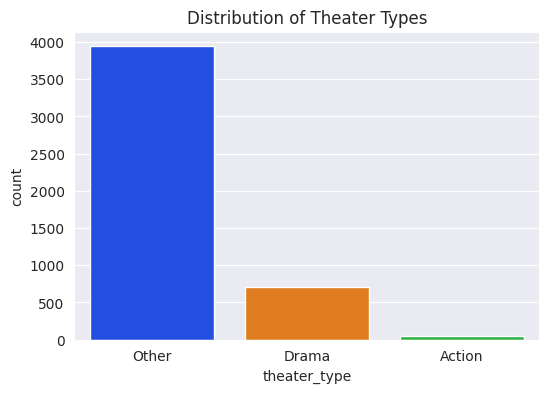

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=cinePOS_theaters, x='theater_type', palette='bright')
plt.title('Distribution of Theater Types')
plt.show()

### 4. How many distinct theaters are present in the dataset named cinePOS_booking?


In [202]:
cinePOS_booking['cine_theater_id'].nunique()

13161

### 5. Combine the datasets booknow_booking and booknow_theaters. What is the shape of this dataset?

**Hint: Read about inner join for dataframes and its implementation using Pandas**

**Note: If the dataset has x rows & y columns, enter your answer as (x,y)**

In [203]:
booknow_theaters.head()

,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017
3,book_00258,Drama,Area_001,22.619233,78.113017
4,book_00212,Drama,Area_002,23.004410,79.934515


In [204]:
# Combine the datasets using INNER JOIN
merged_df = pd.merge(booknow_booking, booknow_theaters, on='book_theater_id', how='inner')

In [205]:
# Check the shape of which i merged the data.
print("Shape of merged dataset:",merged_df.shape)

Shape of merged dataset: (36899, 8)


### 6. Based on the combined dataset obtained in the previous question, how many distinct areas are the theaters located in?

In [206]:
# checking the total distinct areas are..
merged_df['theater_area'].nunique()

50

### 7. Combine the datasets movie_theater_id_relation, cinePOS_booking and cinePOS_theaters. Enter the column names containing missing values as comma seperated values

Hint: Read about inner join for dataframes and its implementation using Pandas


In [207]:
# First i am merging the realtion id with the cine POS booking 
merged_1 = pd.merge(movie_theater_id_relation, cinePOS_booking, on='cine_theater_id', how='inner')

In [208]:
merged_1

,book_theater_id,cine_theater_id,show_datetime,booking_datetime,tickets_sold
0,book_00509,cinePOS_01261,2023-01-04 12:00:00,2023-01-03 14:00:00,7
1,book_00509,cinePOS_01261,2023-01-04 14:00:00,2023-01-02 13:00:00,4
2,book_00509,cinePOS_01261,2023-01-05 12:00:00,2023-01-01 08:00:00,3
3,book_00509,cinePOS_01261,2023-01-09 12:00:00,2023-01-07 20:00:00,6
4,book_00509,cinePOS_01261,2023-01-11 12:00:00,2023-01-10 15:00:00,3
...,...,...,...,...,...
23775,book_00222,cinePOS_06697,2024-01-31 20:00:00,2024-01-31 11:00:00,2
23776,book_00222,cinePOS_06697,2024-02-09 20:00:00,2024-01-29 00:00:00,20
23777,book_00222,cinePOS_06697,2024-02-10 18:00:00,2024-01-25 12:00:00,22
23778,book_00222,cinePOS_06697,2024-02-22 21:00:00,2024-02-20 12:00:00,2


In [209]:
# Now i am merging this with the CinePOS _theaters.
merged_final = pd.merge(merged_1, cinePOS_theaters, on='cine_theater_id', how='inner')

In [210]:
merged_final

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_theater_id,cine_theater_id,show_datetime,booking_datetime,tickets_sold,theater_type,theater_area,latitude,longitude
0,book_00063,cinePOS_02467,2023-01-06 19:00:00,2023-01-06 13:00:00,2,Other,Area_120,NaN,NaN
1,book_00063,cinePOS_02467,2023-01-07 21:00:00,2023-01-03 19:00:00,6,Other,Area_120,NaN,NaN
2,book_00063,cinePOS_02467,2023-01-08 19:00:00,2023-01-07 14:00:00,2,Other,Area_120,NaN,NaN
3,book_00063,cinePOS_02467,2023-01-09 19:00:00,2023-01-02 21:00:00,2,Other,Area_120,NaN,NaN
4,book_00063,cinePOS_02467,2023-01-09 19:00:00,2023-01-07 09:00:00,2,Other,Area_120,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11296,book_00222,cinePOS_06697,2024-01-31 20:00:00,2024-01-31 11:00:00,2,Other,Area_148,NaN,NaN
11297,book_00222,cinePOS_06697,2024-02-09 20:00:00,2024-01-29 00:00:00,20,Other,Area_148,NaN,NaN
11298,book_00222,cinePOS_06697,2024-02-10 18:00:00,2024-01-25 12:00:00,22,Other,Area_148,NaN,NaN
11299,book_00222,cinePOS_06697,2024-02-22 21:00:00,2024-02-20 12:00:00,2,Other,Area_148,NaN,NaN


In [211]:
merged_final.isnull().sum()

book_theater_id        0
cine_theater_id        0
show_datetime          0
booking_datetime       0
tickets_sold           0
theater_type           0
theater_area           0
latitude            9307
longitude           9307
dtype: int64

In [212]:
# Checking that which columns have missing values in the merged final datasets..
missing_columns = merged_final.columns[merged_final.isnull().any()].tolist()
print("Columns with missing values:", ", ".join(missing_columns))


Columns with missing values: latitude, longitude


### 8. Enter the date range spanned in the dataset named booknow_booking. 

**Hint: Find the earliest and latest date for which data is available in this dataset.**

*Note: Enter the answer as "dd-mm-yyyy to dd-mm-yyyy".

In [213]:
booknow_booking

,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5
...,...,...,...,...
68331,book_00523,2024-02-28 23:00:00,2024-02-27 19:00:00,7
68332,book_00073,2024-02-28 23:00:00,2024-02-19 07:00:00,6
68333,book_00456,2024-02-28 23:00:00,2024-02-28 22:00:00,2
68334,book_00388,2024-02-28 23:00:00,2024-02-23 16:00:00,8


In [214]:
import pandas as pd
booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
# Find the earliest and latest show date
earliest_date = booknow_booking['show_datetime'].min().date()
latest_date = booknow_booking['show_datetime'].max().date()

In [215]:
# Format as dd-mm-yyyy to dd-mm-yyyy
date_range = f"{earliest_date.strftime('%d-%m-%Y')} to {latest_date.strftime('%d-%m-%Y')}"
print(date_range)

01-01-2023 to 28-02-2024


### 9. Enter the date range spanned in the test dataset (sample_submission).

**Hint: Find the earliest and latest date for which data is available in this dataset.** 

_Note: Enter the answer as "dd-mm-yyyy to dd-mm-yyyy"._ 

In [216]:
Sample_submission

,ID,audience_count
0,book_00001_2024-03-01,0
1,book_00001_2024-03-02,0
2,book_00001_2024-03-03,0
3,book_00001_2024-03-04,0
4,book_00001_2024-03-06,0
...,...,...
38057,book_00829_2024-04-18,0
38058,book_00829_2024-04-19,0
38059,book_00829_2024-04-20,0
38060,book_00829_2024-04-21,0


In [217]:
import pandas as pd
Sample_submission['book_theater_id'] = Sample_submission['ID'].str.split('_').str[1]
Sample_submission['show_date'] = Sample_submission['ID'].str.split('_').str[2]

In [218]:
Sample_submission['show_date'] = pd.to_datetime(Sample_submission['show_date'])

In [219]:
print(f"{Sample_submission['show_date'].min():%d-%m-%Y} to {Sample_submission['show_date'].max():%d-%m-%Y}")

01-03-2024 to 22-04-2024


# MILESTONE 2

### Q1.In the booknow_booking.csv file, how many total booking records (rows) were made on the same calendar day as the show's date?

- #### Note: The question refers to day / date and not datetime

In [220]:
booknow_booking['booking_datetime'] = pd.to_datetime(booknow_booking['booking_datetime'])
booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])

In [221]:
same_day_bookings = booknow_booking[booknow_booking['booking_datetime'].dt.date == booknow_booking['show_datetime'].dt.date]

In [222]:
t_same_day_bookings = len(same_day_bookings)

In [223]:
print(t_same_day_bookings)

20433


### Q2. How many unique calendar months (e.g., Jan 2023, Feb 2023, ...)    are present in the show_date column of the date_info.csv file?



In [224]:
date_info=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv')

In [225]:
date_info['show_date'] = pd.to_datetime(date_info['show_date'])
date_info['show_date'].dt.to_period('M').nunique()

18

### Q3. What percentage of bookings in booknow_booking.csv were made on a Sunday?

In [226]:
booknow_booking

,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5
...,...,...,...,...
68331,book_00523,2024-02-28 23:00:00,2024-02-27 19:00:00,7
68332,book_00073,2024-02-28 23:00:00,2024-02-19 07:00:00,6
68333,book_00456,2024-02-28 23:00:00,2024-02-28 22:00:00,2
68334,book_00388,2024-02-28 23:00:00,2024-02-23 16:00:00,8


In [227]:
booknow_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68336 entries, 0 to 68335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   book_theater_id   68336 non-null  object        
 1   show_datetime     68336 non-null  datetime64[ns]
 2   booking_datetime  68336 non-null  datetime64[ns]
 3   tickets_booked    68336 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.1+ MB


In [228]:
booknow_booking['booking_day']=booknow_booking['booking_datetime'].dt.day_name()

In [229]:
booknow_booking

,book_theater_id,show_datetime,booking_datetime,tickets_booked,booking_day
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1,Sunday
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3,Sunday
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6,Sunday
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2,Sunday
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5,Sunday
...,...,...,...,...,...
68331,book_00523,2024-02-28 23:00:00,2024-02-27 19:00:00,7,Tuesday
68332,book_00073,2024-02-28 23:00:00,2024-02-19 07:00:00,6,Monday
68333,book_00456,2024-02-28 23:00:00,2024-02-28 22:00:00,2,Wednesday
68334,book_00388,2024-02-28 23:00:00,2024-02-23 16:00:00,8,Friday


In [230]:
data_len=len(booknow_booking)

In [231]:
sunday_booking=len(booknow_booking[booknow_booking['booking_day']=='Sunday'])

In [232]:
sunday_percentage=(sunday_booking/data_len)*100

In [233]:
sunday_percentage

13.32240693046125

### Q4. In the booknow_theaters.csv file, if you decided to impute any missing latitude values by the mean latitude of only theaters with theater_type equal to Drama, what would be the imputation value?

In [234]:
booknow_theaters=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv')

In [235]:
booknow_theaters.isnull().sum()

book_theater_id    515
theater_type         0
theater_area         0
latitude             0
longitude            0
dtype: int64

In [236]:
only_drama=booknow_theaters[booknow_theaters['theater_type']=='Drama']
only_drama.isnull().sum()

book_theater_id    91
theater_type        0
theater_area        0
latitude            0
longitude           0
dtype: int64

In [237]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer

SimpleImputer()

In [238]:
values=imputer.fit_transform(only_drama[['latitude']])
values


array([[22.61923282],
       [22.61923282],
       [22.61923282],
       [22.61923282],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [23.00441038],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.17686942],
       [22.99981198],
       [22.99981198],
       [22.99981198],
       [22.99981198],
       [22.62332782],
       [22.62332782],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.00589406],
       [23.02100942],
       [23.02100942],
       [22.49568094],
       [22.49568094],
       [23

In [239]:
values.mean()

23.00090271008748

### Q5. What is the range (Maximum - Minimum) of the latitude column in the booknow_theaters.csv file (rounded to 4 decimal places)?

In [240]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [241]:
latitude=booknow_theaters[['latitude']].dropna()
latitude

,latitude
0,22.619233
1,22.619233
2,22.619233
3,22.619233
4,23.004410
...,...
824,23.005894
825,23.005894
826,23.005894
827,25.963367


In [242]:
sc=MinMaxScaler()
sc

MinMaxScaler()

In [243]:
scaled=sc.fit_transform(latitude)
scaled

array([[0.13721925],
       [0.13721925],
       [0.13721925],
       [0.13721925],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.22630924],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.0349024 ],
       [0.22524565],
       [0.22524565],
       [0.22524565],
       [0.22524565],
       [0.1381664 ],
       [0.1381664 ],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.22665241],
       [0.23014854],
       [0.23014854],
       [0.1086422 ],
       [0.1086422 ],
       [0.22760877],
       [0.22760877],
       [0.227

In [244]:
lat_range=round((sc.data_max_[0]-sc.data_min_[0]),4)
lat_range

4.3235

### Q6.To handle potential outliers in ticket sales, you decide to cap the tickets_sold column in cinePOS_booking.csv at the 95 th  percentile. Enter that value.

In [245]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

In [246]:
cinePOS_booking=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv')

In [247]:
tickets=cinePOS_booking[['tickets_sold']].dropna()
qt=QuantileTransformer(output_distribution='uniform')
qt

QuantileTransformer()

In [248]:
qt.fit(tickets)

QuantileTransformer()

In [249]:
print(round(np.percentile(tickets,95),2))

14.0


### Q7. Appy OneHot Encoding on all the categorical columns of the dataset cinePOS_theaters.csv. What is the shape of the dataset after applying this transformation?

Note: The result obtained highlights a potential drawback of OneHot encoding. Read about other forms of encoding and the advantages / disadvantages they offer.

In [250]:
cinePOS_theaters=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv')

In [251]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
category_col=cinePOS_theaters.select_dtypes(include=['object']).columns.tolist()
ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [252]:
data=ohe.fit_transform(cinePOS_theaters[category_col])
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [253]:
num_data=cinePOS_theaters.drop(columns=category_col).reset_index(drop=True)
columns=ohe.get_feature_names_out(category_col)


In [254]:
encoded_df = pd.DataFrame(data, columns=ohe.get_feature_names_out(category_col), index=cinePOS_theaters.index)
num_data = cinePOS_theaters.drop(columns=category_col)
final = pd.concat([num_data, encoded_df], axis=1)
final.shape

(4690, 4814)

# MILESTONE 3

**For this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column**

**Split the data into X & y with the target variable audience_count as y and the remaining features as X.** 

**Split the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test**

### 1.What is the shape of X_train after making the said changes?


In [255]:
#booknow_visit=pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")
#booknow_visit['show_date'] = pd.to_datetime(booknow_visit['show_date'], errors='coerce')
#booknow_visit['year'] = booknow_visit['show_date'].dt.year
#booknow_visit['month'] = booknow_visit['show_date'].dt.month
#booknow_visit['day'] = booknow_visit['show_date'].dt.day
#booknow_visit['weekday'] = booknow_visit['show_date'].dt.day_name()

In [256]:
#booknow_visit

In [257]:
#booknow_visit=booknow_visit.drop(columns=['show_date'])
#booknow_visit

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
#X = booknow_visit.drop('audience_count', axis=1)
#X

In [260]:
#y=booknow_visit['audience_count']
#y

In [261]:
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True, random_state=42)

In [262]:
#X_train

In [263]:
X_test

,mean_per_booking,weekday_encoded,month,rolling_7,rolling_30,lag_1,lag_2
0,49.084249,0,12,37.142857,39.000000,10.0,32.0
1,49.084249,2,12,38.000000,38.000000,38.0,32.0
2,49.084249,3,12,59.000000,59.000000,80.0,38.0
3,49.084249,5,12,46.666667,46.666667,22.0,80.0
4,49.084249,6,12,41.000000,41.000000,24.0,22.0
...,...,...,...,...,...,...,...
43139,10.842105,0,2,10.571429,11.800000,14.0,16.0
43140,10.842105,2,2,10.857143,12.200000,16.0,14.0
43141,10.842105,3,2,11.428571,12.066667,8.0,16.0
43142,10.842105,5,2,12.857143,12.066667,16.0,8.0


In [264]:
y_train

86326      54
4998        2
63876      24
147363     52
130073     22
         ... 
119879     82
103694      4
131932    110
146867     38
121958     46
Name: audience_count, Length: 171228, dtype: int64

In [265]:
#y_test

In [266]:
#X_test.shape

In [267]:
#X.shape

In [268]:
# So the final shape of the X_train after the change made.
#X_train.shape

In [269]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [270]:
#numeric_cols=X.select_dtypes(include=['int64','float64']).columns
#categ_cols=X.select_dtypes(include=['object']).columns

In [271]:
#numeric_transformer=MinMaxScaler()
#cat_transformer=OneHotEncoder(handle_unknown='ignore')
#cat_transformer

In [272]:
#numeric_transformer

In [273]:
#transformer=[
#    ('num',numeric_transformer,numeric_cols),
#    ('cat',cat_transformer,categ_cols)
#]
#preprocessor=ColumnTransformer(transformer)
#preprocessor

In [274]:
#from sklearn.svm import LinearSVR
#from sklearn.metrics import r2_score

In [275]:
#svr=LinearSVR()
#svr

In [276]:
'''model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearSVR(random_state=42,C=1.0,max_iter=10000))
])'''

"model=Pipeline(steps=[\n    ('preprocessor',preprocessor),\n    ('regressor',LinearSVR(random_state=42,C=1.0,max_iter=10000))\n])"

In [277]:
#model

In [278]:
#model.fit(X_train,y_train)

In [279]:
#y_pred=model.predict(X_test)

In [280]:
#Use LinearSVR for training and enter the r2_score obtained on the test dataset. Upto 3 decimal places
#r2=r2_score(y_test,y_pred)
#round(r2,3)

### Use TruncatedSVD with n_components = 4 and train LinearSVR again. What is the mean absolute error obtained on the training data? Upto 3 decimal places

In [281]:
'''from sklearn.decomposition import TruncatedSVD
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('svd',TruncatedSVD(n_components=4,random_state=42)),
    ('regressor',LinearSVR(random_state=42,C=1.0,max_iter=10000))
])'''

"from sklearn.decomposition import TruncatedSVD\nmodel=Pipeline(steps=[\n    ('preprocessor',preprocessor),\n    ('svd',TruncatedSVD(n_components=4,random_state=42)),\n    ('regressor',LinearSVR(random_state=42,C=1.0,max_iter=10000))\n])"

In [282]:
#model

In [283]:
#model.fit(X_train,y_train)

In [284]:
#y_train_pred = model.predict(X_train)

In [285]:
#from sklearn.metrics  import mean_absolute_error
#mae=mean_absolute_error(y_train, y_train_pred)

In [286]:
#print(round(mae, 3))

### Based on the previous question, what is the r2_score obtained on the test data? Upto 3 decimal places

In [287]:
#from sklearn.metrics import r2_score
#y_test_pred = model.predict(X_test)
#r2 = r2_score(y_test, y_test_pred)
#print(round(r2, 3))

### Use SelectKBest with k = 2 , score_func = mutual_info_regression.  Based on attributes output by SelectKBest, what is the maximum score obtained?

In [288]:
#from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [289]:
#model=Pipeline(steps=[
 #   ('preprocessor',preprocessor),
  #  ('selector', SelectKBest(score_func=mutual_info_regression,k=2))
#])

In [290]:
#model

In [291]:
'''# Extract scores
selector = model.named_steps['selector']
scores = selector.scores_

max_score = max(scores)
print("Maximum score obtained:", round(max_score, 3))'''

'# Extract scores\nselector = model.named_steps[\'selector\']\nscores = selector.scores_\n\nmax_score = max(scores)\nprint("Maximum score obtained:", round(max_score, 3))'

In [292]:
'''import numpy as np
mean_score = np.mean(scores)
print("Mean score:", round(mean_score, 3))'''

'import numpy as np\nmean_score = np.mean(scores)\nprint("Mean score:", round(mean_score, 3))'

# MILESTONE 4

In [293]:
'''
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
'''

'\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor\nfrom sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV\n'

In [294]:
'''df = booknow_visits.copy()
df['show_date'] = pd.to_datetime(df['show_date'])
df['day'] = df['show_date'].dt.day
df['month'] = df['show_date'].dt.month
df['year'] = df['show_date'].dt.year
df['dayofyear'] = df['show_date'].dt.dayofyear
df.drop(columns=['show_date'], inplace=True)
df.head()
'''

"df = booknow_visits.copy()\ndf['show_date'] = pd.to_datetime(df['show_date'])\ndf['day'] = df['show_date'].dt.day\ndf['month'] = df['show_date'].dt.month\ndf['year'] = df['show_date'].dt.year\ndf['dayofyear'] = df['show_date'].dt.dayofyear\ndf.drop(columns=['show_date'], inplace=True)\ndf.head()\n"

In [295]:
# Define features and target
#X = df.drop(columns=['audience_count'])
#y = df['audience_count']


In [296]:
#print(X)

In [297]:
#print(y)

In [298]:
#split_index = int(len(df) * 0.8)
#X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
#y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [299]:
#numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = X_train.select_dtypes(include=['object', 'category']).columns


In [300]:
#numeric_features

In [301]:
#categorical_features

In [302]:
'''numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
'''

"numeric_transformer = MinMaxScaler()\ncategorical_transformer = OneHotEncoder(handle_unknown='ignore')\n"

In [303]:
'''preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor'''

"preprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numeric_transformer, numeric_features),\n        ('cat', categorical_transformer, categorical_features)\n    ])\npreprocessor"

In [304]:
'''dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_model.fit(X_train, y_train)
'''

"dt_model = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('regressor', DecisionTreeRegressor(random_state=42))\n])\n\ndt_model.fit(X_train, y_train)\n"

In [305]:
'''y_train_pred = dt_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R² on Train:", round(r2_train, 3))
'''

'y_train_pred = dt_model.predict(X_train)\nr2_train = r2_score(y_train, y_train_pred)\nprint("R² on Train:", round(r2_train, 3))\n'

In [306]:
'''y_test_pred = dt_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R² on Test:", round(r2_test, 3))
'''

'y_test_pred = dt_model.predict(X_test)\nr2_test = r2_score(y_test, y_test_pred)\nprint("R² on Test:", round(r2_test, 3))\n'

In [307]:
''''param_grid = {
    'regressor__max_depth': [None, 3, 5, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
tscv = TimeSeriesSplit(n_splits=5)
grid_dt = GridSearchCV(dt_model, param_grid, cv=tscv, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)'''

"'param_grid = {\n    'regressor__max_depth': [None, 3, 5, 10],\n    'regressor__min_samples_split': [2, 5, 10],\n    'regressor__min_samples_leaf': [1, 2, 4]\n}\ntscv = TimeSeriesSplit(n_splits=5)\ngrid_dt = GridSearchCV(dt_model, param_grid, cv=tscv, scoring='r2', n_jobs=-1)\ngrid_dt.fit(X_train, y_train)\nprint(grid_dt.best_params_)"

In [308]:
'''bag_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(random_state=42))
])
bag_model'''

"bag_model = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('regressor', BaggingRegressor(random_state=42))\n])\nbag_model"

In [309]:
# bag_model.fit(X_train, y_train)

In [310]:
''''from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred = bag_model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(round(rmse_train, 3))
'''

"'from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error\ny_train_pred = bag_model.predict(X_train)\nrmse_train = mean_squared_error(y_train, y_train_pred, squared=False)\nprint(round(rmse_train, 3))\n"

In [311]:
'''y_test_pred = bag_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(round(rmse_test, 3))'''

'y_test_pred = bag_model.predict(X_test)\nrmse_test = mean_squared_error(y_test, y_test_pred, squared=False)\nprint(round(rmse_test, 3))'

In [312]:
'''param_grid_bag = {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_samples': [0.5, 0.7, 1.0],
    'regressor__max_features': [0.5, 0.8, 1.0]
}
grid_bag = GridSearchCV(bag_model, param_grid_bag, cv=tscv, scoring='r2', n_jobs=-1)
grid_bag.fit(X_train, y_train)'''

"param_grid_bag = {\n    'regressor__n_estimators': [10, 50, 100],\n    'regressor__max_samples': [0.5, 0.7, 1.0],\n    'regressor__max_features': [0.5, 0.8, 1.0]\n}\ngrid_bag = GridSearchCV(bag_model, param_grid_bag, cv=tscv, scoring='r2', n_jobs=-1)\ngrid_bag.fit(X_train, y_train)"

In [313]:
#print("Best Score:", round(grid_bag.best_score_, 3))

In [314]:
'''gbr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gbr_model.fit(X_train, y_train)
y_train_pred = gbr_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE on Train:", round(mae_train, 3))'''

'gbr_model = Pipeline(steps=[\n    (\'preprocessor\', preprocessor),\n    (\'regressor\', GradientBoostingRegressor(random_state=42))\n])\n\ngbr_model.fit(X_train, y_train)\ny_train_pred = gbr_model.predict(X_train)\nmae_train = mean_absolute_error(y_train, y_train_pred)\nprint("MAE on Train:", round(mae_train, 3))'

In [315]:
'''y_test_pred = gbr_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(round(mae_test, 3))
'''

'y_test_pred = gbr_model.predict(X_test)\nmae_test = mean_absolute_error(y_test, y_test_pred)\nprint(round(mae_test, 3))\n'